# Nvidia Transfer Learning Toolkit
First thing let's setup our API Key

In [45]:
API_KEY='dXZvNGYxOXRuMzIwNHN1N2oyNWV2dmo5NmE6MmIzNWRlNmEtYzQ3Yy00NGJmLWEwMTQtZmZiMGI1ZmZhMzIw'

In [1]:
API_KEY='<your-API_KEY-here>'

Now before proceeding further lets make sure we have all the required directories  
otherwise please create them as we move further.

In [1]:
!pwd
!ls

/workspace
API_KEY.sh	       dataset		 retrained_model  tf_records
EXPERIMENT.ipynb       pretrained_model  scripts	  trained_model
SMCHYD_TLT_DEMO.ipynb  pruned_model	 spec_files



**Our training dataset resides inside**  
````
/workspace/dataset/KITTI_original/training
    |--image_2
    |--label_2

````
Let's have a quick look to the dataset.

In [21]:
!echo Total Training Images:
!ls /workspace/dataset/KITTI_original/training/image_2 -l | wc -l
!echo
!echo Total Training Labels:
!ls /workspace/dataset/KITTI_original/training/label_2 -l | wc -l

Total Training Images:
7482

Total Training Labels:
7482


let's see one of the example image.

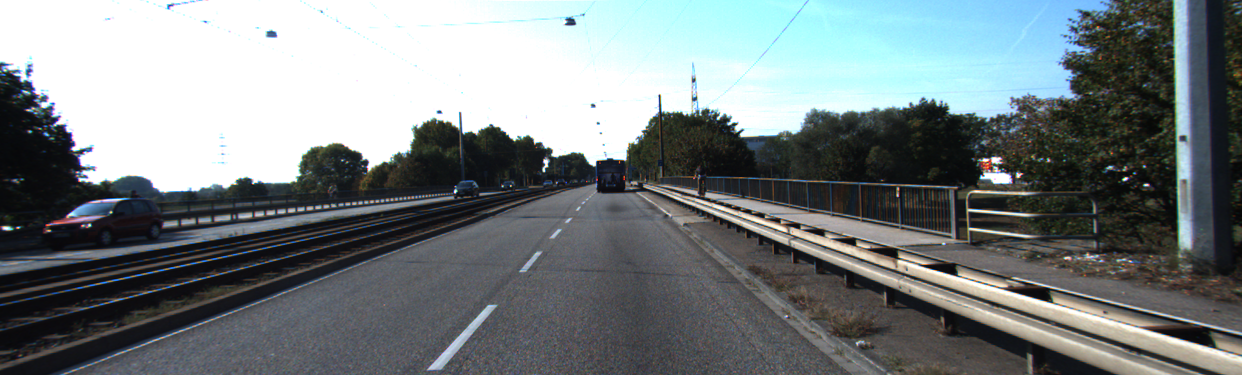

HxW: (375, 1242)


In [68]:
from IPython.display import display
from PIL import Image


path = '/workspace/dataset/KITTI_original/training/image_2/003945.png'
image = Image.open(path)
display(image)
width, height = image.size
print("HxW: ({}, {})".format(height, width))

let's confirm our dataset label file has all the 15 required columns.

In [41]:
!cat /workspace/dataset/KITTI_original/training/label_2/003945.txt

Truck 0.00 0 -1.58 596.67 157.49 627.86 191.26 2.85 2.63 12.34 0.14 1.62 67.71 -1.58
Cyclist 0.00 2 2.28 120.47 189.06 157.85 227.31 1.63 0.56 1.46 -20.88 2.36 31.97 1.70
Car 0.00 0 2.17 41.66 195.99 172.62 252.29 1.67 1.87 3.69 -16.96 2.51 24.51 1.57
Car 0.00 0 1.77 453.14 181.53 481.56 199.90 1.63 1.78 4.13 -13.24 2.45 67.13 1.58
Cyclist 0.00 3 -1.69 693.31 163.13 711.15 202.46 1.86 0.60 2.02 4.46 1.41 35.19 -1.57
DontCare -1 -1 -10 499.21 177.30 588.77 192.47 -1 -1 -1 -1000 -1000 -1000 -10


### Resizing all images
Now before actually starting the training, let us resize all the images to an uniform resolution.  
we can do that using our helper scipt: ``scripts/kitti_resize.py``  
let us find an optimal resolution to resize our images to.

In [13]:
from PIL import Image
import os

root_path = '/workspace/dataset/KITTI_original/training/image_2'
image_list = os.listdir(root_path)

for image_name in image_list:
    image = Image.open(os.path.join(root_path, image_name))
    width, height = image.size
    print(height, width)

(375, 1242)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(376, 1241)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(376, 1241)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(376, 1241)
(375, 1242)
(376

(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(370, 1224)
(370, 1224)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375

(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(376, 1241)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(376, 1241)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(370, 1224)
(375, 1242)
(376, 1241)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375

(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(370, 1224)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375

(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(376, 1241)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(374, 1238)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(376, 1241)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375

(375, 1242)
(376, 1241)
(375, 1242)
(370, 1224)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(376, 1241)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(370, 1224)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(376, 1241)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(374, 1238)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375

(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(376, 1241)
(370, 1224)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(376, 1241)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(374, 1238)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(376, 1241)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(376, 1241)
(374

(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(376, 1241)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(376, 1241)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(376, 1241)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(376, 1241)
(376, 1241)
(375

(375, 1242)
(375, 1242)
(376, 1241)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(374, 1238)
(376, 1241)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(374, 1238)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(376, 1241)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(375, 1242)
(375, 1242)
(376, 1241)
(374, 1238)
(375, 1242)
(375, 1242)
(375, 1242)
(375, 1242)
(370, 1224)
(375, 1242)
(374

As with the above code execution, it is clear that most of the images in our dataset are of ``HxW: 375x1242``.  
so, we can resize all the images to: ``HxW: 128, 512`` dimension while rescaling their labels simultaneously.  
we need to create directories so store our resized images and label files.  
reason, why we choosed this dimensions is because it is in multiple of 16, relatively smaller than original image and has aspect ration closer to the original.  
````bash
original HxW: (375, 1242) ==> aspect ratio W/H: 3.32
new HxW: (128, 512) ==> aspect ratio W/H: 4
````

In [21]:
import os
try:
    os.makedirs('/workspace/dataset/KITTI_original/training/image_2_resized')
    os.makedirs('/workspace/dataset/KITTI_original/training/label_2_resized')
except Exception as e:
    print(e)
!ls /workspace/dataset/KITTI_original/training/

[Errno 17] File exists: '/workspace/dataset/KITTI_original/training/image_2_resized'
image_2  image_2_resized  label_2  label_2_resized


Now we can start resizing our dataset.

In [8]:
!python scripts/kitti_resize.py -im /workspace/dataset/KITTI_original/training/image_2/ \
                        -il /workspace/dataset/KITTI_original/training/label_2/ \
                        -om /workspace/dataset/KITTI_original/training/image_2_resized/ \
                        -ol  /workspace/dataset/KITTI_original/training/label_2_resized/ \
                        --height 128 --width 512

>> reading directory: ['/workspace/dataset/KITTI_original/training/image_2/','/workspace/dataset/KITTI_original/training/label_2/']
>> total ['images', 'labels'] found: 7481
>> writing to: ['/workspace/dataset/KITTI_original/training/image_2_resized/', '/workspace/dataset/KITTI_original/training/label_2_resized/']
>> Elapsed time: 181.92 sec


Again before proceeding further, lets have a look to our resized dataset

In [9]:
!echo Total Training Images:
!ls /workspace/dataset/KITTI_original/training/image_2_resized -l | wc -l
!echo
!echo Total Training Labels:
!ls /workspace/dataset/KITTI_original/training/label_2_resized -l | wc -l

Total Training Images:
7482

Total Training Labels:
7482


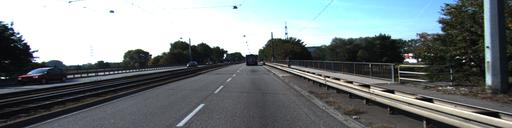

HxW: (128, 512)


In [67]:
from IPython.display import display
from PIL import Image

path = '/workspace/dataset/KITTI_original/training/image_2_resized/003945_128x512.jpg'
image = Image.open(path)
display(image)
width, height = image.size
print("HxW: ({}, {})".format(height, width))

let's confirm our resized dataset label file has all the 15 required columns.

In [12]:
!cat /workspace/dataset/KITTI_original/training/label_2_resized/003945_128x512.txt

Truck 0.00 0 0.00 245.69 53.59 258.47 65.19 0.00 0.00 0.00 0.00 0.00 0.00 0.00
Cyclist 0.00 0 0.00 49.47 64.51 64.72 77.48 0.00 0.00 0.00 0.00 0.00 0.00 0.00
Car 0.00 0 0.00 16.9 66.56 70.9 86.02 0.00 0.00 0.00 0.00 0.00 0.00 0.00
Car 0.00 0 0.00 186.74 61.78 198.29 67.93 0.00 0.00 0.00 0.00 0.00 0.00 0.00
Cyclist 0.00 0 0.00 285.68 55.64 293.1 68.95 0.00 0.00 0.00 0.00 0.00 0.00 0.00
DontCare 0.00 0 0.00 205.71 60.42 242.4 65.54 0.00 0.00 0.00 0.00 0.00 0.00 0.00


In [13]:
from PIL import Image
import os

root_path = '/workspace/dataset/KITTI_original/training/image_2_resized/'
image_list = os.listdir(root_path)

for image_name in image_list:
    image = Image.open(os.path.join(root_path, image_name))
    width, height = image.size
    print(height, width)

(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)

(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)

(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)

(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)

(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)

(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)

(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)

(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)

(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)
(128, 512)

### Downloading pre-trained model
view models available on NGC.

In [25]:
!ngc registry model list *detectnet*

+---------+---------+---------+---------+---------+---------+---------+---------+
| Name    | Reposit | Latest  | Applica | Framewo | Precisi | Last Mo | Permiss |
|         | ory     | Version | tion    | rk      | on      | dified  | ion     |
+---------+---------+---------+---------+---------+---------+---------+---------+
| TLT Goo | nvidia/ | 1       | Object  | Transfe | FP32    | Oct 18, | unlocke |
| gLeNet  | iva/tlt |         | Detecti | r Learn |         | 2019    | d       |
| DetectN | _google |         | on      | ing     |         |         |         |
| et_v2   | net_det |         |         | Toolkit |         |         |         |
|         | ectnet_ |         |         |         |         |         |         |
|         | v2      |         |         |         |         |         |         |
| TLT Mob | nvidia/ | 1       | Object  | Transfe | FP32    | Oct 18, | unlocke |
| ileNet  | iva/tlt |         | Detecti | r Learn |         | 2019    | d       |
| v1 Dete | _mob

Download our chosen model

In [28]:
!ngc registry model download-version nvidia/iva/tlt_resnet18_detectnet_v2:1 -d /workspace/pretrained_model

Downloaded 82.28 MB in 14s, Download speed: 5.87 MB/s               
----------------------------------------------------
Transfer id: tlt_resnet18_detectnet_v2_v1 Download status: Completed.
Downloaded local path: /workspace/pretrained_model/tlt_resnet18_detectnet_v2_v1
Total files downloaded: 2 
Total downloaded size: 82.28 MB
Started at: 2019-11-18 11:27:11.285476
Completed at: 2019-11-18 11:27:25.311400
Duration taken: 14s seconds
----------------------------------------------------


Let's examine the contents of that folder, to check that a .hdf5 file has been downloaded.

In [29]:
!ls /workspace/pretrained_model/tlt_resnet18_detectnet_v2_v1

license.txt  resnet18.hdf5



## Convert dataset to TFRecords
We convert our dataset into TFRecords using the tlt-dataset-convert command  
We use a spec file to describe the dataset: /workspace/spec_files/convert.txt  
let's have a quick look to ``convert.txt`` file

In [15]:
!cat /workspace/spec_files/convert.txt

kitti_config {
  root_directory_path: "/workspace/dataset/KITTI_original/training"
  image_dir_name: "image_2_resized"
  label_dir_name: "label_2_resized"
  image_extension: ".jpg"
  partition_mode: "random"
  num_partitions:2
  val_split: 15
  num_shards: 10
}
image_directory_path: "/workspace/dataset/KITTI_original/training"


### Let's convert our dataset to tfrecords

In [16]:
!tlt-dataset-convert -d spec_files/convert.txt -o /workspace/tf_records/

Using TensorFlow backend.
2019-11-19 09:45:14,580 - iva.detectnet_v2.dataio.build_converter - INFO - Instantiating a kitti converter
2019-11-19 09:45:14,607 - iva.detectnet_v2.dataio.kitti_converter_lib - INFO - Num images in
Train: 6359	Val: 1122
2019-11-19 09:45:14,607 - iva.detectnet_v2.dataio.kitti_converter_lib - INFO - Validation data in partition 0. Hence, while choosing the validationset during training choose validation_fold 0.
2019-11-19 09:45:14,610 - iva.detectnet_v2.dataio.dataset_converter_lib - INFO - Writing partition 0, shard 0
/usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/dataio/kitti_converter_lib.py:266: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
2019-11-19 09:45:14,765 - iva.detectnet_v2.dataio.dataset_converter_lib - INFO - Writing partition 0, shard 1
2019-11-19 09:45:14,910 - iva.detectnet_v2.dataio.dataset_converter_lib - INFO - Writing p

### Looking into generated tfrecords files

In [18]:
!ls /workspace/tf_records/

-fold-000-of-002-shard-00000-of-00010  -fold-001-of-002-shard-00000-of-00010
-fold-000-of-002-shard-00001-of-00010  -fold-001-of-002-shard-00001-of-00010
-fold-000-of-002-shard-00002-of-00010  -fold-001-of-002-shard-00002-of-00010
-fold-000-of-002-shard-00003-of-00010  -fold-001-of-002-shard-00003-of-00010
-fold-000-of-002-shard-00004-of-00010  -fold-001-of-002-shard-00004-of-00010
-fold-000-of-002-shard-00005-of-00010  -fold-001-of-002-shard-00005-of-00010
-fold-000-of-002-shard-00006-of-00010  -fold-001-of-002-shard-00006-of-00010
-fold-000-of-002-shard-00007-of-00010  -fold-001-of-002-shard-00007-of-00010
-fold-000-of-002-shard-00008-of-00010  -fold-001-of-002-shard-00008-of-00010
-fold-000-of-002-shard-00009-of-00010  -fold-001-of-002-shard-00009-of-00010


## Training
for training the model we need to create a training spec_file  
let's have a quick look to: ``/workspace/spec_files/train.txt``

In [19]:
!cat /workspace/spec_files/train.txt

random_seed: 42
model_config {
  pretrained_model_file: "/workspace/pretrained_model/tlt_resnet18_detectnet_v2_v1/resnet18.hdf5"
  num_layers: 18
  
  freeze_blocks: 0
  arch: "resnet"
  use_batch_norm: true
  activation {
    activation_type: "relu"
  }
  dropout_rate: 0.1
  objective_set: {
    cov {}
    bbox {
      scale: 35.0
      offset: 0.5
    }
  }
  training_precision {
    backend_floatx: FLOAT32
 }
}

bbox_rasterizer_config {
  target_class_config {
    key: "car"
    value: {
      cov_center_x: 0.5
      cov_center_y: 0.5
      cov_radius_x: 0.4
      cov_radius_y: 0.4
      bbox_min_radius: 1.0
    }
  }
  target_class_config {
    key: "pedestrian"
    value: {
      cov_center_x: 0.5
      cov_center_y: 0.5
      cov_radius_x: 1.0
      cov_radius_y: 1.0
      bbox_min_radius: 1.0
    }
  }
  target_class_config {
    key: "cyclist"
    value: {
      cov_center_x: 0.5
      cov_center_y: 0.5
      cov_radius_x: 1.0
      cov_radius_y: 1.0
      bbox_min_radius: 1.0


In [20]:
!tlt-train detectnet_v2 -e spec_files/train.txt \
        -r /workspace/trained_model --gpus 5 -k $API_KEY

Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
2019-11-19 09:45:54.824112: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-11-19 09:45:54.824255: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-11-19 09:45:54.824442: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-11-19 09:45:54.824996: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-11-19 09:45:54.825330: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


2019-11-19 09:46:03.563194: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x7103450 executing computations on platform Host. Devices:
2019-11-19 09:46:03.563224: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-11-19 09:46:03.563268: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x6d790e0 executing computations on platform Host. Devices:
2019-11-19 09:46:03.563319: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-11-19 09:46:03.564054: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1433] Found device 0 with properties: 
name: Tesla V100-SXM2-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.53
pciBusID: 0000:06:00.0
totalMemory: 31.72GiB freeMemory: 29.84GiB
2019-11-19 09:46:03.564085: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0
2019-11-19 09:46:03.564214: I tensorflow/core/common_runtime/gpu/

2019-11-19 09:46:03,784 [INFO] iva.detectnet_v2.scripts.train: Cannot iterate over exactly 6359 samples with a batch size of 16; each epoch will therefore take one extra step.
2019-11-19 09:46:03,785 [INFO] iva.detectnet_v2.scripts.train: Cannot iterate over exactly 79 steps per epoch with 16 processors; each processor will therefore take one extra step per epoch.
2019-11-19 09:46:03,785 [INFO] iva.detectnet_v2.scripts.train: Cannot iterate over exactly 6359 samples with a batch size of 16; each epoch will therefore take one extra step.
2019-11-19 09:46:03,785 [INFO] iva.detectnet_v2.scripts.train: Cannot iterate over exactly 79 steps per epoch with 16 processors; each processor will therefore take one extra step per epoch.
Instructions for updating:
Colocations handled automatically by placer.
2019-11-19 09:46:03,793 [WARNING] tensorflow: From /usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3, 128, 512)  0                                            
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 256)  9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 256)  256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 64, 64, 256)  0           bn_conv1[0][0]                   
___________

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3, 128, 512)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 256)  9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 256)  256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 64, 64, 256)  0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
block_1a_c

target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3, 128, 512)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 256)  9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 256)  256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1

target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is

INFO:tensorflow:Graph was finalized.
2019-11-19 09:46:40,300 [INFO] tensorflow: Graph was finalized.
2019-11-19 09:46:40.301741: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 1
2019-11-19 09:46:40.301813: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-11-19 09:46:40.301825: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      1 
2019-11-19 09:46:40.301832: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   N 
2019-11-19 09:46:40.302297: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 29392 MB memory) -> physical GPU (device: 1, name: Tesla V100-SXM2-32GB, pci bus id: 0000:07:00.0, compute capability: 7.0)
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
INFO:tensorflow:Graph was finalized.
2019-11-19 09:46:40,999 [INFO]

[2019-11-19 09:48:54.832988: W horovod/common/operations.cc:588] DistributedAdamOptimizer_Allreduce/HorovodAllreduce_gradients_resnet18_nopool_bn_detectnet_v2_block_3b_bn_1_FusedBatchNorm_grad_tuple_control_dependency_2_0 [missing ranks: 0]
[2019-11-19 09:48:54.833007: W horovod/common/operations.cc:588] DistributedAdamOptimizer_Allreduce/HorovodAllreduce_gradients_AddN_23_0 [missing ranks: 0]
[2019-11-19 09:48:54.833033: W horovod/common/operations.cc:588] DistributedAdamOptimizer_Allreduce/HorovodAllreduce_gradients_resnet18_nopool_bn_detectnet_v2_block_3b_bn_1_FusedBatchNorm_grad_tuple_control_dependency_1_0 [missing ranks: 0]
[2019-11-19 09:48:54.833071: W horovod/common/operations.cc:588] DistributedAdamOptimizer_Allreduce/HorovodAllreduce_gradients_AddN_22_0 [missing ranks: 0]
[2019-11-19 09:48:54.833092: W horovod/common/operations.cc:588] DistributedAdamOptimizer_Allreduce/HorovodAllreduce_gradients_resnet18_nopool_bn_detectnet_v2_block_3b_bn_2_FusedBatchNorm_grad_tuple_control

INFO:tensorflow:global_step/sec: 6.15351
2019-11-19 09:49:29,934 [INFO] tensorflow: global_step/sec: 6.15351
INFO:tensorflow:global_step/sec: 6.02368
2019-11-19 09:49:31,262 [INFO] tensorflow: global_step/sec: 6.02368
2019-11-19 09:49:31,263 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 53.947
INFO:tensorflow:global_step/sec: 6.25433
2019-11-19 09:49:32,541 [INFO] tensorflow: global_step/sec: 6.25433
INFO:tensorflow:global_step/sec: 6.2154
2019-11-19 09:49:33,828 [INFO] tensorflow: global_step/sec: 6.2154
INFO:tensorflow:epoch = 0.5125000000000001, loss = 0.024537377, step = 41 (5.190 sec)
2019-11-19 09:49:33,989 [INFO] tensorflow: epoch = 0.5125000000000001, loss = 0.024537377, step = 41 (5.190 sec)
INFO:tensorflow:epoch = 0.5125000000000001, loss = 0.02229548, step = 41 (5.191 sec)
2019-11-19 09:49:33,990 [INFO] tensorflow: epoch = 0.5125000000000001, loss = 0.02229548, step = 41 (5.191 sec)
INFO:tensorflow:epoch = 0.51

2019-11-19 09:50:40,631 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 492.679
INFO:tensorflow:global_step/sec: 6.17134
2019-11-19 09:50:41,112 [INFO] tensorflow: global_step/sec: 6.17134
INFO:tensorflow:global_step/sec: 6.03003
2019-11-19 09:50:42,438 [INFO] tensorflow: global_step/sec: 6.03003
2019-11-19 09:50:42,439 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 2/120: loss: 0.00305 Time taken: 0:00:13.102631 ETA: 0:25:46.110458
INFO:tensorflow:global_step/sec: 5.90685
2019-11-19 09:50:43,793 [INFO] tensorflow: global_step/sec: 5.90685
2019-11-19 09:50:44,770 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 483.211
INFO:tensorflow:epoch = 2.2, loss = 0.0027448928, step = 176 (5.280 sec)
2019-11-19 09:50:45,095 [INFO] tensorflow: epoch = 2.2, loss = 0.0027448928, step = 176 (5.280 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 6.05
2019-11-19 09:51:08,760 [INFO] tensorflow: global_step/sec: 6.05
2019-11-19 09:51:08,761 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 4/120: loss: 0.00230 Time taken: 0:00:13.111849 ETA: 0:25:20.974484
2019-11-19 09:51:09,400 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 489.797
INFO:tensorflow:global_step/sec: 6.23767
2019-11-19 09:51:10,042 [INFO] tensorflow: global_step/sec: 6.23767
INFO:tensorflow:epoch = 4.2, loss = 0.002215387, step = 336 (5.209 sec)
2019-11-19 09:51:11,355 [INFO] tensorflow: epoch = 4.2, loss = 0.002215387, step = 336 (5.209 sec)
INFO:tensorflow:global_step/sec: 6.0887
2019-11-19 09:51:11,356 [INFO] tensorflow: global_step/sec: 6.0887
INFO:tensorflow:epoch = 4.2125, loss = 0.0021547712, step = 337 (5.213 sec)
2019-11-19 09:51:11,516 [INFO] tensorflow: epoch = 4.2125, loss = 0.0021547712, step = 337

INFO:tensorflow:global_step/sec: 6.37398
2019-11-19 09:51:36,147 [INFO] tensorflow: global_step/sec: 6.37398
INFO:tensorflow:global_step/sec: 6.27394
2019-11-19 09:51:37,422 [INFO] tensorflow: global_step/sec: 6.27394
INFO:tensorflow:epoch = 6.2125, loss = 0.0018568055, step = 497 (5.258 sec)
2019-11-19 09:51:37,580 [INFO] tensorflow: epoch = 6.2125, loss = 0.0018568055, step = 497 (5.258 sec)
INFO:tensorflow:epoch = 6.2250000000000005, loss = 0.0021697918, step = 498 (5.279 sec)
2019-11-19 09:51:37,760 [INFO] tensorflow: epoch = 6.2250000000000005, loss = 0.0021697918, step = 498 (5.279 sec)
INFO:tensorflow:epoch = 6.2250000000000005, loss = 0.0017445271, step = 498 (5.280 sec)
2019-11-19 09:51:37,761 [INFO] tensorflow: epoch = 6.2250000000000005, loss = 0.0017445271, step = 498 (5.280 sec)
INFO:tensorflow:epoch = 6.2250000000000005, loss = 0.0019022892, step = 498 (5.279 sec)
2019-11-19 09:51:37,762 [INFO] tensorflow: epoch = 6.2250000000000005, loss = 0.0019022892, step = 498 (5.279

2019-11-19 09:52:02,330 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 493.728
INFO:tensorflow:global_step/sec: 6.17548
2019-11-19 09:52:03,461 [INFO] tensorflow: global_step/sec: 6.17548
INFO:tensorflow:epoch = 8.225, loss = 0.0017327808, step = 658 (5.177 sec)
2019-11-19 09:52:03,790 [INFO] tensorflow: epoch = 8.225, loss = 0.0017327808, step = 658 (5.177 sec)
INFO:tensorflow:epoch = 8.225, loss = 0.0016641036, step = 658 (5.176 sec)
2019-11-19 09:52:03,792 [INFO] tensorflow: epoch = 8.225, loss = 0.0016641036, step = 658 (5.176 sec)
INFO:tensorflow:epoch = 8.225, loss = 0.0016873761, step = 658 (5.176 sec)
2019-11-19 09:52:03,792 [INFO] tensorflow: epoch = 8.225, loss = 0.0016873761, step = 658 (5.176 sec)
INFO:tensorflow:epoch = 8.225, loss = 0.0015265428, step = 658 (5.175 sec)
2019-11-19 09:52:03,792 [INFO] tensorflow: epoch = 8.225, loss = 0.0015265428, step = 658 (5.175 sec)
INFO:tensorflow:epoch = 8.225, loss = 0.

INFO:tensorflow:epoch = 10.175, loss = 0.001498111, step = 814 (5.203 sec)
2019-11-19 09:52:29,929 [INFO] tensorflow: epoch = 10.175, loss = 0.001498111, step = 814 (5.203 sec)
INFO:tensorflow:epoch = 10.175, loss = 0.0016257567, step = 814 (5.203 sec)
INFO:tensorflow:epoch = 10.175, loss = 0.0018682564, step = 814 (5.202 sec)
2019-11-19 09:52:29,931 [INFO] tensorflow: epoch = 10.175, loss = 0.0018682564, step = 814 (5.202 sec)
2019-11-19 09:52:29,931 [INFO] tensorflow: epoch = 10.175, loss = 0.0016257567, step = 814 (5.203 sec)
INFO:tensorflow:epoch = 10.175, loss = 0.0012882764, step = 814 (5.203 sec)
2019-11-19 09:52:29,931 [INFO] tensorflow: epoch = 10.175, loss = 0.0012882764, step = 814 (5.203 sec)
INFO:tensorflow:epoch = 10.175, loss = 0.0013715096, step = 814 (5.204 sec)
2019-11-19 09:52:29,932 [INFO] tensorflow: epoch = 10.175, loss = 0.0013715096, step = 814 (5.204 sec)
INFO:tensorflow:global_step/sec: 6.22883
2019-11-19 09:52:30,253 [INFO] tensorflow: global_step/sec: 6.2288

INFO:tensorflow:global_step/sec: 5.99954
2019-11-19 09:53:21,196 [INFO] tensorflow: global_step/sec: 5.99954
2019-11-19 09:53:21,874 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 481.222
INFO:tensorflow:global_step/sec: 5.89098
2019-11-19 09:53:22,554 [INFO] tensorflow: global_step/sec: 5.89098
INFO:tensorflow:global_step/sec: 5.8993
2019-11-19 09:53:23,910 [INFO] tensorflow: global_step/sec: 5.8993
INFO:tensorflow:epoch = 11.787500000000001, loss = 0.001825025, step = 943 (5.252 sec)
2019-11-19 09:53:25,114 [INFO] tensorflow: epoch = 11.787500000000001, loss = 0.001825025, step = 943 (5.252 sec)
INFO:tensorflow:epoch = 11.8, loss = 0.0013930614, step = 944 (5.259 sec)
2019-11-19 09:53:25,279 [INFO] tensorflow: epoch = 11.8, loss = 0.0013930614, step = 944 (5.259 sec)
INFO:tensorflow:epoch = 11.8, loss = 0.0015684806, step = 944 (5.262 sec)
2019-11-19 09:53:25,282 [INFO] tensorflow: epoch = 11.8, loss = 0.0015684806, step

INFO:tensorflow:global_step/sec: 5.99164
2019-11-19 09:53:48,064 [INFO] tensorflow: global_step/sec: 5.99164
INFO:tensorflow:global_step/sec: 5.8842
2019-11-19 09:53:49,423 [INFO] tensorflow: global_step/sec: 5.8842
INFO:tensorflow:global_step/sec: 5.88219
2019-11-19 09:53:50,784 [INFO] tensorflow: global_step/sec: 5.88219
INFO:tensorflow:epoch = 13.7375, loss = 0.0012827942, step = 1099 (5.259 sec)
2019-11-19 09:53:51,288 [INFO] tensorflow: epoch = 13.7375, loss = 0.0012827942, step = 1099 (5.259 sec)
2019-11-19 09:53:51,289 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 473.861
INFO:tensorflow:epoch = 13.75, loss = 0.0011994398, step = 1100 (5.253 sec)
2019-11-19 09:53:51,447 [INFO] tensorflow: epoch = 13.75, loss = 0.0011994398, step = 1100 (5.253 sec)
INFO:tensorflow:epoch = 13.75, loss = 0.0011272291, step = 1100 (5.255 sec)
2019-11-19 09:53:51,450 [INFO] tensorflow: epoch = 13.75, loss = 0.0011272291, step = 1100 (5.

INFO:tensorflow:global_step/sec: 5.8846
2019-11-19 09:54:14,962 [INFO] tensorflow: global_step/sec: 5.8846
INFO:tensorflow:global_step/sec: 5.88189
2019-11-19 09:54:16,322 [INFO] tensorflow: global_step/sec: 5.88189
2019-11-19 09:54:16,491 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 473.730
INFO:tensorflow:epoch = 15.700000000000001, loss = 0.0014581769, step = 1256 (5.222 sec)
2019-11-19 09:54:17,657 [INFO] tensorflow: epoch = 15.700000000000001, loss = 0.0014581769, step = 1256 (5.222 sec)
INFO:tensorflow:epoch = 15.700000000000001, loss = 0.0014944589, step = 1256 (5.221 sec)
2019-11-19 09:54:17,657 [INFO] tensorflow: epoch = 15.700000000000001, loss = 0.0014944589, step = 1256 (5.221 sec)
INFO:tensorflow:epoch = 15.700000000000001, loss = 0.0010214834, step = 1256 (5.223 sec)
2019-11-19 09:54:17,658 [INFO] tensorflow: epoch = 15.700000000000001, loss = 0.0010214834, step = 1256 (5.223 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:global_step/sec: 5.6512
2019-11-19 09:54:39,796 [INFO] tensorflow: global_step/sec: 5.6512
INFO:tensorflow:global_step/sec: 5.75465
2019-11-19 09:54:41,187 [INFO] tensorflow: global_step/sec: 5.75465
2019-11-19 09:54:42,393 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 457.749
INFO:tensorflow:global_step/sec: 5.82068
2019-11-19 09:54:42,561 [INFO] tensorflow: global_step/sec: 5.82068
INFO:tensorflow:epoch = 17.587500000000002, loss = 0.0012936795, step = 1407 (5.225 sec)
2019-11-19 09:54:43,779 [INFO] tensorflow: epoch = 17.587500000000002, loss = 0.0012936795, step = 1407 (5.225 sec)
INFO:tensorflow:epoch = 17.587500000000002, loss = 0.0010242835, step = 1407 (5.226 sec)
2019-11-19 09:54:43,780 [INFO] tensorflow: epoch = 17.587500000000002, loss = 0.0010242835, step = 1407 (5.226 sec)
INFO:tensorflow:epoch = 17.587500000000002, loss = 0.0010199703, step = 1407 (5.227 sec)
2019-11-19 09:54:43,783 [INFO] te

INFO:tensorflow:global_step/sec: 6.08689
2019-11-19 09:55:08,757 [INFO] tensorflow: global_step/sec: 6.08689
INFO:tensorflow:epoch = 19.5, loss = 0.0010888134, step = 1560 (5.240 sec)
2019-11-19 09:55:10,120 [INFO] tensorflow: epoch = 19.5, loss = 0.0010888134, step = 1560 (5.240 sec)
INFO:tensorflow:epoch = 19.5, loss = 0.0010971576, step = 1560 (5.239 sec)
2019-11-19 09:55:10,122 [INFO] tensorflow: epoch = 19.5, loss = 0.0010971576, step = 1560 (5.239 sec)
INFO:tensorflow:epoch = 19.5, loss = 0.0010919108, step = 1560 (5.243 sec)
2019-11-19 09:55:10,124 [INFO] tensorflow: epoch = 19.5, loss = 0.0010919108, step = 1560 (5.243 sec)
INFO:tensorflow:epoch = 19.5, loss = 0.0013238004, step = 1560 (5.244 sec)
2019-11-19 09:55:10,124 [INFO] tensorflow: epoch = 19.5, loss = 0.0013238004, step = 1560 (5.244 sec)
INFO:tensorflow:global_step/sec: 5.84884
2019-11-19 09:55:10,125 [INFO] tensorflow: global_step/sec: 5.84884
INFO:tensorflow:epoch = 19.512500000000003, loss = 0.0010162286, step = 15

INFO:tensorflow:global_step/sec: 5.95108
2019-11-19 09:56:11,216 [INFO] tensorflow: global_step/sec: 5.95108
INFO:tensorflow:global_step/sec: 5.90388
2019-11-19 09:56:12,571 [INFO] tensorflow: global_step/sec: 5.90388
INFO:tensorflow:global_step/sec: 6.01264
2019-11-19 09:56:13,902 [INFO] tensorflow: global_step/sec: 6.01264
2019-11-19 09:56:13,903 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 476.538
INFO:tensorflow:global_step/sec: 5.90126
2019-11-19 09:56:15,257 [INFO] tensorflow: global_step/sec: 5.90126
INFO:tensorflow:epoch = 22.9375, loss = 0.000926184, step = 1835 (5.232 sec)
2019-11-19 09:56:15,765 [INFO] tensorflow: epoch = 22.9375, loss = 0.000926184, step = 1835 (5.232 sec)
INFO:tensorflow:epoch = 22.9375, loss = 0.001149589, step = 1835 (5.229 sec)
2019-11-19 09:56:15,766 [INFO] tensorflow: epoch = 22.9375, loss = 0.001149589, step = 1835 (5.229 sec)
INFO:tensorflow:epoch = 22.9375, loss = 0.0010616012, step 

2019-11-19 09:56:39,243 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 481.356
INFO:tensorflow:global_step/sec: 6.01458
2019-11-19 09:56:39,563 [INFO] tensorflow: global_step/sec: 6.01458
INFO:tensorflow:global_step/sec: 5.70143
2019-11-19 09:56:40,966 [INFO] tensorflow: global_step/sec: 5.70143
INFO:tensorflow:epoch = 24.8625, loss = 0.0010704035, step = 1989 (5.208 sec)
2019-11-19 09:56:41,960 [INFO] tensorflow: epoch = 24.8625, loss = 0.0010704035, step = 1989 (5.208 sec)
INFO:tensorflow:epoch = 24.8625, loss = 0.0008762616, step = 1989 (5.207 sec)
2019-11-19 09:56:41,962 [INFO] tensorflow: epoch = 24.8625, loss = 0.0008762616, step = 1989 (5.207 sec)
INFO:tensorflow:epoch = 24.8625, loss = 0.0010272749, step = 1989 (5.210 sec)
INFO:tensorflow:epoch = 24.8625, loss = 0.0011648126, step = 1989 (5.211 sec)
2019-11-19 09:56:41,965 [INFO] tensorflow: epoch = 24.8625, loss = 0.0010272749, step = 1989 (5.210 sec)
2019-11-19 0

INFO:tensorflow:global_step/sec: 5.98944
2019-11-19 09:57:05,348 [INFO] tensorflow: global_step/sec: 5.98944
INFO:tensorflow:global_step/sec: 5.88089
2019-11-19 09:57:06,708 [INFO] tensorflow: global_step/sec: 5.88089
INFO:tensorflow:epoch = 26.8, loss = 0.0008598042, step = 2144 (5.218 sec)
2019-11-19 09:57:08,037 [INFO] tensorflow: epoch = 26.8, loss = 0.0008598042, step = 2144 (5.218 sec)
INFO:tensorflow:epoch = 26.8, loss = 0.00097409764, step = 2144 (5.219 sec)
2019-11-19 09:57:08,039 [INFO] tensorflow: epoch = 26.8, loss = 0.00097409764, step = 2144 (5.219 sec)
INFO:tensorflow:epoch = 26.8, loss = 0.00095228944, step = 2144 (5.219 sec)
2019-11-19 09:57:08,040 [INFO] tensorflow: epoch = 26.8, loss = 0.00095228944, step = 2144 (5.219 sec)
INFO:tensorflow:epoch = 26.8, loss = 0.0013317787, step = 2144 (5.217 sec)
2019-11-19 09:57:08,042 [INFO] tensorflow: epoch = 26.8, loss = 0.0013317787, step = 2144 (5.217 sec)
INFO:tensorflow:global_step/sec: 5.99332
2019-11-19 09:57:08,043 [INFO

INFO:tensorflow:global_step/sec: 6.33338
2019-11-19 09:57:32,095 [INFO] tensorflow: global_step/sec: 6.33338
INFO:tensorflow:global_step/sec: 6.36655
2019-11-19 09:57:33,352 [INFO] tensorflow: global_step/sec: 6.36655
2019-11-19 09:57:33,844 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 502.551
INFO:tensorflow:epoch = 28.775000000000002, loss = 0.00085959694, step = 2302 (5.264 sec)
2019-11-19 09:57:34,324 [INFO] tensorflow: epoch = 28.775000000000002, loss = 0.00085959694, step = 2302 (5.264 sec)
INFO:tensorflow:epoch = 28.775000000000002, loss = 0.0010155373, step = 2302 (5.264 sec)
2019-11-19 09:57:34,326 [INFO] tensorflow: epoch = 28.775000000000002, loss = 0.0010155373, step = 2302 (5.264 sec)
INFO:tensorflow:epoch = 28.775000000000002, loss = 0.0010149581, step = 2302 (5.264 sec)
2019-11-19 09:57:34,327 [INFO] tensorflow: epoch = 28.775000000000002, loss = 0.0010149581, step = 2302 (5.264 sec)
INFO:tensorflow:epoch 

INFO:tensorflow:global_step/sec: 5.84667
2019-11-19 09:57:58,500 [INFO] tensorflow: global_step/sec: 5.84667
INFO:tensorflow:global_step/sec: 5.95939
2019-11-19 09:57:59,842 [INFO] tensorflow: global_step/sec: 5.95939
2019-11-19 09:58:00,026 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 471.720
INFO:tensorflow:epoch = 30.650000000000002, loss = 0.0009494181, step = 2452 (5.262 sec)
2019-11-19 09:58:00,524 [INFO] tensorflow: epoch = 30.650000000000002, loss = 0.0009494181, step = 2452 (5.262 sec)
INFO:tensorflow:epoch = 30.650000000000002, loss = 0.00081782683, step = 2452 (5.260 sec)
2019-11-19 09:58:00,525 [INFO] tensorflow: epoch = 30.650000000000002, loss = 0.00081782683, step = 2452 (5.260 sec)
INFO:tensorflow:epoch = 30.650000000000002, loss = 0.00088083587, step = 2452 (5.261 sec)
2019-11-19 09:58:00,525 [INFO] tensorflow: epoch = 30.650000000000002, loss = 0.00088083587, step = 2452 (5.261 sec)
INFO:tensorflow:epoc

INFO:tensorflow:epoch = 32.2, loss = 0.0010908805, step = 2576 (5.223 sec)
2019-11-19 09:58:39,349 [INFO] tensorflow: epoch = 32.2, loss = 0.0010908805, step = 2576 (5.223 sec)
INFO:tensorflow:global_step/sec: 6.18732
2019-11-19 09:58:39,350 [INFO] tensorflow: global_step/sec: 6.18732
INFO:tensorflow:epoch = 32.2125, loss = 0.0009823847, step = 2577 (5.220 sec)
2019-11-19 09:58:39,509 [INFO] tensorflow: epoch = 32.2125, loss = 0.0009823847, step = 2577 (5.220 sec)
INFO:tensorflow:epoch = 32.2125, loss = 0.00078925374, step = 2577 (5.218 sec)
INFO:tensorflow:epoch = 32.2125, loss = 0.0008427808, step = 2577 (5.218 sec)
2019-11-19 09:58:39,509 [INFO] tensorflow: epoch = 32.2125, loss = 0.00078925374, step = 2577 (5.218 sec)
2019-11-19 09:58:39,509 [INFO] tensorflow: epoch = 32.2125, loss = 0.0008427808, step = 2577 (5.218 sec)
INFO:tensorflow:epoch = 32.2125, loss = 0.000972403, step = 2577 (5.216 sec)
2019-11-19 09:58:39,510 [INFO] tensorflow: epoch = 32.2125, loss = 0.000972403, step =

INFO:tensorflow:epoch = 34.1875, loss = 0.00081456325, step = 2735 (5.319 sec)
2019-11-19 09:59:05,869 [INFO] tensorflow: epoch = 34.1875, loss = 0.00081456325, step = 2735 (5.319 sec)
INFO:tensorflow:epoch = 34.1875, loss = 0.0010332298, step = 2735 (5.319 sec)
2019-11-19 09:59:05,870 [INFO] tensorflow: epoch = 34.1875, loss = 0.0010332298, step = 2735 (5.319 sec)
INFO:tensorflow:epoch = 34.1875, loss = 0.00091827405, step = 2735 (5.320 sec)
2019-11-19 09:59:05,871 [INFO] tensorflow: epoch = 34.1875, loss = 0.00091827405, step = 2735 (5.320 sec)
INFO:tensorflow:epoch = 34.1875, loss = 0.0008294764, step = 2735 (5.320 sec)
2019-11-19 09:59:05,873 [INFO] tensorflow: epoch = 34.1875, loss = 0.0008294764, step = 2735 (5.320 sec)
INFO:tensorflow:global_step/sec: 6.18403
2019-11-19 09:59:06,033 [INFO] tensorflow: global_step/sec: 6.18403
INFO:tensorflow:global_step/sec: 6.10159
2019-11-19 09:59:07,344 [INFO] tensorflow: global_step/sec: 6.10159
2019-11-19 09:59:08,160 [INFO] /usr/local/lib/

INFO:tensorflow:global_step/sec: 6.11416
2019-11-19 09:59:32,940 [INFO] tensorflow: global_step/sec: 6.11416
2019-11-19 09:59:33,463 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 480.463
INFO:tensorflow:global_step/sec: 5.81196
2019-11-19 09:59:34,317 [INFO] tensorflow: global_step/sec: 5.81196
INFO:tensorflow:global_step/sec: 5.7526
2019-11-19 09:59:35,707 [INFO] tensorflow: global_step/sec: 5.7526
INFO:tensorflow:epoch = 36.5, loss = 0.0013102671, step = 2920 (5.270 sec)
2019-11-19 09:59:37,066 [INFO] tensorflow: epoch = 36.5, loss = 0.0013102671, step = 2920 (5.270 sec)
INFO:tensorflow:global_step/sec: 5.88314
2019-11-19 09:59:37,067 [INFO] tensorflow: global_step/sec: 5.88314
INFO:tensorflow:epoch = 36.525, loss = 0.0007912992, step = 2922 (5.280 sec)
2019-11-19 09:59:37,409 [INFO] tensorflow: epoch = 36.525, loss = 0.0007912992, step = 2922 (5.280 sec)
INFO:tensorflow:epoch = 36.525, loss = 0.0010443763, step = 2922 

INFO:tensorflow:global_step/sec: 6.06279
2019-11-19 09:59:59,698 [INFO] tensorflow: global_step/sec: 6.06279
INFO:tensorflow:global_step/sec: 6.05295
2019-11-19 10:00:01,020 [INFO] tensorflow: global_step/sec: 6.05295
INFO:tensorflow:global_step/sec: 5.9226
2019-11-19 10:00:02,370 [INFO] tensorflow: global_step/sec: 5.9226
2019-11-19 10:00:02,721 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 478.169
INFO:tensorflow:epoch = 38.462500000000006, loss = 0.0012058197, step = 3077 (5.182 sec)
2019-11-19 10:00:03,214 [INFO] tensorflow: epoch = 38.462500000000006, loss = 0.0012058197, step = 3077 (5.182 sec)
INFO:tensorflow:epoch = 38.5, loss = 0.0007874424, step = 3080 (5.175 sec)
2019-11-19 10:00:03,710 [INFO] tensorflow: epoch = 38.5, loss = 0.0007874424, step = 3080 (5.175 sec)
INFO:tensorflow:epoch = 38.5, loss = 0.0007330811, step = 3080 (5.174 sec)
2019-11-19 10:00:03,710 [INFO] tensorflow: epoch = 38.5, loss = 0.000733081

INFO:tensorflow:global_step/sec: 6.0578
2019-11-19 10:00:25,520 [INFO] tensorflow: global_step/sec: 6.0578
INFO:tensorflow:global_step/sec: 6.06374
2019-11-19 10:00:26,839 [INFO] tensorflow: global_step/sec: 6.06374
INFO:tensorflow:global_step/sec: 6.15994
2019-11-19 10:00:28,138 [INFO] tensorflow: global_step/sec: 6.15994
2019-11-19 10:00:28,139 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 486.356
INFO:tensorflow:epoch = 40.400000000000006, loss = 0.0012363135, step = 3232 (5.237 sec)
2019-11-19 10:00:29,435 [INFO] tensorflow: epoch = 40.400000000000006, loss = 0.0012363135, step = 3232 (5.237 sec)
INFO:tensorflow:global_step/sec: 6.1603
2019-11-19 10:00:29,436 [INFO] tensorflow: global_step/sec: 6.1603
INFO:tensorflow:epoch = 40.425000000000004, loss = 0.0010789521, step = 3234 (5.237 sec)
2019-11-19 10:00:29,770 [INFO] tensorflow: epoch = 40.425000000000004, loss = 0.0010789521, step = 3234 (5.237 sec)
INFO:tensorflow

2019-11-19 10:01:08,316 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 476.830
INFO:tensorflow:global_step/sec: 6.09527
2019-11-19 10:01:08,832 [INFO] tensorflow: global_step/sec: 6.09527
INFO:tensorflow:global_step/sec: 5.90064
2019-11-19 10:01:10,188 [INFO] tensorflow: global_step/sec: 5.90064
2019-11-19 10:01:10,189 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 42/120: loss: 0.00112 Time taken: 0:00:13.422121 ETA: 0:17:26.925438
INFO:tensorflow:global_step/sec: 6.10303
2019-11-19 10:01:11,499 [INFO] tensorflow: global_step/sec: 6.10303
INFO:tensorflow:epoch = 42.175000000000004, loss = 0.0010946683, step = 3374 (5.298 sec)
2019-11-19 10:01:12,481 [INFO] tensorflow: epoch = 42.175000000000004, loss = 0.0010946683, step = 3374 (5.298 sec)
2019-11-19 10:01:12,481 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Sam

INFO:tensorflow:global_step/sec: 5.99878
2019-11-19 10:01:36,775 [INFO] tensorflow: global_step/sec: 5.99878
2019-11-19 10:01:36,776 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 44/120: loss: 0.00133 Time taken: 0:00:13.403948 ETA: 0:16:58.700048
2019-11-19 10:01:37,455 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 488.505
INFO:tensorflow:global_step/sec: 5.88855
2019-11-19 10:01:38,133 [INFO] tensorflow: global_step/sec: 5.88855
INFO:tensorflow:epoch = 44.150000000000006, loss = 0.0012459259, step = 3532 (5.266 sec)
2019-11-19 10:01:38,784 [INFO] tensorflow: epoch = 44.150000000000006, loss = 0.0012459259, step = 3532 (5.266 sec)
INFO:tensorflow:epoch = 44.175000000000004, loss = 0.0007300653, step = 3534 (5.266 sec)
2019-11-19 10:01:39,103 [INFO] tensorflow: epoch = 44.175000000000004, loss = 0.0007300653, step = 3534 (5.266 sec)
INFO:tensorflow:epoch = 44.

INFO:tensorflow:global_step/sec: 5.96424
2019-11-19 10:02:03,587 [INFO] tensorflow: global_step/sec: 5.96424
2019-11-19 10:02:03,588 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 46/120: loss: 0.00128 Time taken: 0:00:13.266430 ETA: 0:16:21.715820
INFO:tensorflow:global_step/sec: 6.07249
2019-11-19 10:02:04,904 [INFO] tensorflow: global_step/sec: 6.07249
INFO:tensorflow:epoch = 46.112500000000004, loss = 0.0013484134, step = 3689 (5.222 sec)
2019-11-19 10:02:05,068 [INFO] tensorflow: epoch = 46.112500000000004, loss = 0.0013484134, step = 3689 (5.222 sec)
INFO:tensorflow:epoch = 46.1375, loss = 0.00083006616, step = 3691 (5.201 sec)
2019-11-19 10:02:05,384 [INFO] tensorflow: epoch = 46.1375, loss = 0.00083006616, step = 3691 (5.201 sec)
INFO:tensorflow:epoch = 46.1375, loss = 0.0007662439, step = 3691 (5.202 sec)
INFO:tensorflow:epoch = 46.1375, loss = 0.0007025248, step = 3691 (5.202 sec)
2019-11-19 10:02:05,387 [INFO] ten

INFO:tensorflow:global_step/sec: 6.0531
2019-11-19 10:02:31,056 [INFO] tensorflow: global_step/sec: 6.0531
2019-11-19 10:02:31,236 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 493.025
INFO:tensorflow:epoch = 48.125, loss = 0.0012686844, step = 3850 (5.259 sec)
2019-11-19 10:02:31,411 [INFO] tensorflow: epoch = 48.125, loss = 0.0012686844, step = 3850 (5.259 sec)
INFO:tensorflow:epoch = 48.150000000000006, loss = 0.0007267153, step = 3852 (5.253 sec)
2019-11-19 10:02:31,733 [INFO] tensorflow: epoch = 48.150000000000006, loss = 0.0007267153, step = 3852 (5.253 sec)
INFO:tensorflow:epoch = 48.150000000000006, loss = 0.0007441053, step = 3852 (5.252 sec)
2019-11-19 10:02:31,735 [INFO] tensorflow: epoch = 48.150000000000006, loss = 0.0007441053, step = 3852 (5.252 sec)
INFO:tensorflow:epoch = 48.150000000000006, loss = 0.0007987475, step = 3852 (5.252 sec)
2019-11-19 10:02:31,735 [INFO] tensorflow: epoch = 48.150000000000006,

INFO:tensorflow:epoch = 50.0625, loss = 0.0012868177, step = 4005 (5.249 sec)
2019-11-19 10:02:57,627 [INFO] tensorflow: epoch = 50.0625, loss = 0.0012868177, step = 4005 (5.249 sec)
INFO:tensorflow:epoch = 50.1, loss = 0.00073232874, step = 4008 (5.251 sec)
2019-11-19 10:02:58,118 [INFO] tensorflow: epoch = 50.1, loss = 0.00073232874, step = 4008 (5.251 sec)
INFO:tensorflow:epoch = 50.1, loss = 0.00062974234, step = 4008 (5.251 sec)
2019-11-19 10:02:58,120 [INFO] tensorflow: epoch = 50.1, loss = 0.00062974234, step = 4008 (5.251 sec)
INFO:tensorflow:epoch = 50.1, loss = 0.0006691619, step = 4008 (5.252 sec)
2019-11-19 10:02:58,120 [INFO] tensorflow: epoch = 50.1, loss = 0.0006691619, step = 4008 (5.252 sec)
INFO:tensorflow:global_step/sec: 6.04097
2019-11-19 10:02:58,123 [INFO] tensorflow: global_step/sec: 6.04097
INFO:tensorflow:epoch = 50.1, loss = 0.00070646027, step = 4008 (5.253 sec)
2019-11-19 10:02:58,123 [INFO] tensorflow: epoch = 50.1, loss = 0.00070646027, step = 4008 (5.253

INFO:tensorflow:global_step/sec: 5.82307
2019-11-19 10:03:37,703 [INFO] tensorflow: global_step/sec: 5.82307
2019-11-19 10:03:38,371 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 466.100
INFO:tensorflow:global_step/sec: 6.07412
2019-11-19 10:03:39,020 [INFO] tensorflow: global_step/sec: 6.07412
INFO:tensorflow:global_step/sec: 6.15068
2019-11-19 10:03:40,321 [INFO] tensorflow: global_step/sec: 6.15068
INFO:tensorflow:epoch = 51.7875, loss = 0.001380918, step = 4143 (5.325 sec)
2019-11-19 10:03:41,479 [INFO] tensorflow: epoch = 51.7875, loss = 0.001380918, step = 4143 (5.325 sec)
INFO:tensorflow:epoch = 51.800000000000004, loss = 0.00062388566, step = 4144 (5.323 sec)
2019-11-19 10:03:41,649 [INFO] tensorflow: epoch = 51.800000000000004, loss = 0.00062388566, step = 4144 (5.323 sec)
INFO:tensorflow:global_step/sec: 6.01891
2019-11-19 10:03:41,650 [INFO] tensorflow: global_step/sec: 6.01891
INFO:tensorflow:epoch = 51.800000

INFO:tensorflow:global_step/sec: 5.75994
2019-11-19 10:04:04,268 [INFO] tensorflow: global_step/sec: 5.75994
INFO:tensorflow:global_step/sec: 5.83796
2019-11-19 10:04:05,638 [INFO] tensorflow: global_step/sec: 5.83796
INFO:tensorflow:global_step/sec: 5.8386
2019-11-19 10:04:07,008 [INFO] tensorflow: global_step/sec: 5.8386
2019-11-19 10:04:07,550 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 462.557
INFO:tensorflow:epoch = 53.75, loss = 0.0012736144, step = 4300 (5.199 sec)
2019-11-19 10:04:07,733 [INFO] tensorflow: epoch = 53.75, loss = 0.0012736144, step = 4300 (5.199 sec)
INFO:tensorflow:epoch = 53.7625, loss = 0.00072310737, step = 4301 (5.220 sec)
2019-11-19 10:04:07,923 [INFO] tensorflow: epoch = 53.7625, loss = 0.00072310737, step = 4301 (5.220 sec)
INFO:tensorflow:epoch = 53.7625, loss = 0.000703261, step = 4301 (5.219 sec)
2019-11-19 10:04:07,924 [INFO] tensorflow: epoch = 53.7625, loss = 0.000703261, step = 4301

INFO:tensorflow:global_step/sec: 5.86047
2019-11-19 10:04:29,765 [INFO] tensorflow: global_step/sec: 5.86047
INFO:tensorflow:global_step/sec: 5.64559
2019-11-19 10:04:31,182 [INFO] tensorflow: global_step/sec: 5.64559
INFO:tensorflow:global_step/sec: 6.03096
2019-11-19 10:04:32,508 [INFO] tensorflow: global_step/sec: 6.03096
2019-11-19 10:04:32,670 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 468.569
INFO:tensorflow:global_step/sec: 6.13333
2019-11-19 10:04:33,812 [INFO] tensorflow: global_step/sec: 6.13333
INFO:tensorflow:epoch = 55.712500000000006, loss = 0.0013164203, step = 4457 (5.254 sec)
2019-11-19 10:04:33,976 [INFO] tensorflow: epoch = 55.712500000000006, loss = 0.0013164203, step = 4457 (5.254 sec)
INFO:tensorflow:epoch = 55.725, loss = 0.0006523537, step = 4458 (5.244 sec)
2019-11-19 10:04:34,132 [INFO] tensorflow: epoch = 55.725, loss = 0.0006523537, step = 4458 (5.244 sec)
INFO:tensorflow:epoch = 55.725, los

INFO:tensorflow:global_step/sec: 6.28584
2019-11-19 10:04:56,775 [INFO] tensorflow: global_step/sec: 6.28584
2019-11-19 10:04:57,870 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 494.645
INFO:tensorflow:global_step/sec: 6.29064
2019-11-19 10:04:58,047 [INFO] tensorflow: global_step/sec: 6.29064
INFO:tensorflow:global_step/sec: 6.21625
2019-11-19 10:04:59,334 [INFO] tensorflow: global_step/sec: 6.21625
INFO:tensorflow:epoch = 57.675000000000004, loss = 0.0011486202, step = 4614 (5.251 sec)
2019-11-19 10:05:00,279 [INFO] tensorflow: epoch = 57.675000000000004, loss = 0.0011486202, step = 4614 (5.251 sec)
INFO:tensorflow:epoch = 57.6875, loss = 0.0007136463, step = 4615 (5.247 sec)
2019-11-19 10:05:00,431 [INFO] tensorflow: epoch = 57.6875, loss = 0.0007136463, step = 4615 (5.247 sec)
INFO:tensorflow:epoch = 57.6875, loss = 0.00074569776, step = 4615 (5.249 sec)
2019-11-19 10:05:00,433 [INFO] tensorflow: epoch = 57.6875, los

INFO:tensorflow:global_step/sec: 6.05214
2019-11-19 10:05:21,667 [INFO] tensorflow: global_step/sec: 6.05214
2019-11-19 10:05:22,464 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 491.175
INFO:tensorflow:global_step/sec: 6.07287
2019-11-19 10:05:22,984 [INFO] tensorflow: global_step/sec: 6.07287
INFO:tensorflow:global_step/sec: 6.2682
2019-11-19 10:05:24,260 [INFO] tensorflow: global_step/sec: 6.2682
INFO:tensorflow:global_step/sec: 6.01511
2019-11-19 10:05:25,590 [INFO] tensorflow: global_step/sec: 6.01511
INFO:tensorflow:epoch = 59.650000000000006, loss = 0.0011845799, step = 4772 (5.175 sec)
2019-11-19 10:05:26,362 [INFO] tensorflow: epoch = 59.650000000000006, loss = 0.0011845799, step = 4772 (5.175 sec)
INFO:tensorflow:epoch = 59.6625, loss = 0.0007233055, step = 4773 (5.175 sec)
2019-11-19 10:05:26,518 [INFO] tensorflow: epoch = 59.6625, loss = 0.0007233055, step = 4773 (5.175 sec)
INFO:tensorflow:epoch = 59.6625, lo

INFO:tensorflow:epoch = 61.0125, loss = 0.00062307366, step = 4881 (22.310 sec)
2019-11-19 10:06:04,453 [INFO] tensorflow: epoch = 61.0125, loss = 0.00062307366, step = 4881 (22.310 sec)
INFO:tensorflow:epoch = 61.0125, loss = 0.0006904859, step = 4881 (22.310 sec)
2019-11-19 10:06:04,456 [INFO] tensorflow: epoch = 61.0125, loss = 0.0006904859, step = 4881 (22.310 sec)
INFO:tensorflow:epoch = 61.0125, loss = 0.00067357125, step = 4881 (22.309 sec)
2019-11-19 10:06:04,456 [INFO] tensorflow: epoch = 61.0125, loss = 0.00067357125, step = 4881 (22.309 sec)
INFO:tensorflow:epoch = 61.0125, loss = 0.00073358335, step = 4881 (22.309 sec)
2019-11-19 10:06:04,458 [INFO] tensorflow: epoch = 61.0125, loss = 0.00073358335, step = 4881 (22.309 sec)
INFO:tensorflow:global_step/sec: 6.19572
2019-11-19 10:06:05,586 [INFO] tensorflow: global_step/sec: 6.19572
INFO:tensorflow:global_step/sec: 6.03269
2019-11-19 10:06:06,912 [INFO] tensorflow: global_step/sec: 6.03269
2019-11-19 10:06:07,424 [INFO] /usr/

INFO:tensorflow:global_step/sec: 5.86688
2019-11-19 10:06:31,271 [INFO] tensorflow: global_step/sec: 5.86688
2019-11-19 10:06:31,272 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 63/120: loss: 0.00130 Time taken: 0:00:13.743373 ETA: 0:13:03.372261
INFO:tensorflow:global_step/sec: 5.98215
2019-11-19 10:06:32,608 [INFO] tensorflow: global_step/sec: 5.98215
2019-11-19 10:06:32,787 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 470.173
INFO:tensorflow:global_step/sec: 6.01429
2019-11-19 10:06:33,939 [INFO] tensorflow: global_step/sec: 6.01429
INFO:tensorflow:global_step/sec: 6.05846
2019-11-19 10:06:35,259 [INFO] tensorflow: global_step/sec: 6.05846
INFO:tensorflow:epoch = 63.337500000000006, loss = 0.00056334387, step = 5067 (5.171 sec)
2019-11-19 10:06:35,762 [INFO] tensorflow: epoch = 63.337500000000006, loss = 0.00056334387, step = 5067 (5.171 sec)
INFO:tensorf

2019-11-19 10:06:58,040 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 478.672
INFO:tensorflow:global_step/sec: 6.09534
2019-11-19 10:06:58,205 [INFO] tensorflow: global_step/sec: 6.09534
2019-11-19 10:06:58,207 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 65/120: loss: 0.00144 Time taken: 0:00:13.532796 ETA: 0:12:24.303780
INFO:tensorflow:global_step/sec: 6.07665
2019-11-19 10:06:59,522 [INFO] tensorflow: global_step/sec: 6.07665
INFO:tensorflow:global_step/sec: 6.06354
2019-11-19 10:07:00,841 [INFO] tensorflow: global_step/sec: 6.06354
INFO:tensorflow:epoch = 65.28750000000001, loss = 0.00071817695, step = 5223 (5.265 sec)
2019-11-19 10:07:01,985 [INFO] tensorflow: epoch = 65.28750000000001, loss = 0.00071817695, step = 5223 (5.265 sec)
INFO:tensorflow:epoch = 65.28750000000001, loss = 0.0007912285, step = 5223 (5.266 sec)
2019-11-19 10:07:01,987 [INFO] tens

INFO:tensorflow:global_step/sec: 6.04135
2019-11-19 10:07:24,411 [INFO] tensorflow: global_step/sec: 6.04135
2019-11-19 10:07:24,412 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 67/120: loss: 0.00136 Time taken: 0:00:13.155594 ETA: 0:11:37.246482
INFO:tensorflow:global_step/sec: 6.16935
2019-11-19 10:07:25,708 [INFO] tensorflow: global_step/sec: 6.16935
2019-11-19 10:07:26,662 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 493.455
INFO:tensorflow:global_step/sec: 6.28925
2019-11-19 10:07:26,980 [INFO] tensorflow: global_step/sec: 6.28925
INFO:tensorflow:epoch = 67.3, loss = 0.0005782035, step = 5384 (5.222 sec)
2019-11-19 10:07:28,304 [INFO] tensorflow: epoch = 67.3, loss = 0.0005782035, step = 5384 (5.222 sec)
INFO:tensorflow:epoch = 67.3, loss = 0.00067684316, step = 5384 (5.221 sec)
2019-11-19 10:07:28,305 [INFO] tensorflow: epoch = 67.3, loss = 0.000676843

2019-11-19 10:07:51,434 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 491.946
INFO:tensorflow:global_step/sec: 6.15975
2019-11-19 10:07:52,084 [INFO] tensorflow: global_step/sec: 6.15975
INFO:tensorflow:global_step/sec: 5.98511
2019-11-19 10:07:53,420 [INFO] tensorflow: global_step/sec: 5.98511
INFO:tensorflow:epoch = 69.3, loss = 0.0007014051, step = 5544 (5.262 sec)
2019-11-19 10:07:54,718 [INFO] tensorflow: epoch = 69.3, loss = 0.0007014051, step = 5544 (5.262 sec)
INFO:tensorflow:epoch = 69.3, loss = 0.0006422675, step = 5544 (5.261 sec)
2019-11-19 10:07:54,721 [INFO] tensorflow: epoch = 69.3, loss = 0.0006422675, step = 5544 (5.261 sec)
INFO:tensorflow:epoch = 69.3, loss = 0.00071211177, step = 5544 (5.262 sec)
2019-11-19 10:07:54,722 [INFO] tensorflow: epoch = 69.3, loss = 0.00071211177, step = 5544 (5.262 sec)
INFO:tensorflow:global_step/sec: 6.13281
2019-11-19 10:07:54,725 [INFO] tensorflow: global_step/sec: 6.132

2019-11-19 10:08:24,829 [INFO] iva.detectnet_v2.evaluation.evaluation: step 30 / 70, 0.22s/step
2019-11-19 10:08:27,113 [INFO] iva.detectnet_v2.evaluation.evaluation: step 40 / 70, 0.23s/step
2019-11-19 10:08:29,382 [INFO] iva.detectnet_v2.evaluation.evaluation: step 50 / 70, 0.23s/step
2019-11-19 10:08:31,642 [INFO] iva.detectnet_v2.evaluation.evaluation: step 60 / 70, 0.23s/step
Matching predictions to ground truth, class 1/3.: 100% 32065/32065 [00:02<00:00, 11736.40it/s]
Matching predictions to ground truth, class 2/3.: 100% 6892/6892 [00:00<00:00, 13343.17it/s]
Matching predictions to ground truth, class 3/3.: 100% 905/905 [00:00<00:00, 12812.50it/s]
Epoch 71/120

Validation cost: 0.000611
Mean average_precision (in %): 22.7115

class name      average precision (in %)
------------  --------------------------
car                             34.8182
cyclist                          6.05698
pedestrian                      27.2595

Median Inference Time: 0.005943
INFO:tensorflow:epoch

INFO:tensorflow:global_step/sec: 5.79648
2019-11-19 10:09:00,024 [INFO] tensorflow: global_step/sec: 5.79648
INFO:tensorflow:global_step/sec: 6.0977
2019-11-19 10:09:01,336 [INFO] tensorflow: global_step/sec: 6.0977
INFO:tensorflow:global_step/sec: 6.06813
2019-11-19 10:09:02,655 [INFO] tensorflow: global_step/sec: 6.06813
2019-11-19 10:09:02,656 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 477.735
INFO:tensorflow:global_step/sec: 6.1257
2019-11-19 10:09:03,961 [INFO] tensorflow: global_step/sec: 6.1257
INFO:tensorflow:epoch = 72.9375, loss = 0.0013527712, step = 5835 (5.306 sec)
2019-11-19 10:09:04,468 [INFO] tensorflow: epoch = 72.9375, loss = 0.0013527712, step = 5835 (5.306 sec)
INFO:tensorflow:epoch = 72.95, loss = 0.0006148884, step = 5836 (5.315 sec)
2019-11-19 10:09:04,641 [INFO] tensorflow: epoch = 72.95, loss = 0.0006148884, step = 5836 (5.315 sec)
INFO:tensorflow:epoch = 72.95, loss = 0.0006260341, step = 5836

2019-11-19 10:09:27,932 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 462.430
INFO:tensorflow:global_step/sec: 5.71426
2019-11-19 10:09:28,285 [INFO] tensorflow: global_step/sec: 5.71426
INFO:tensorflow:global_step/sec: 5.8849
2019-11-19 10:09:29,644 [INFO] tensorflow: global_step/sec: 5.8849
INFO:tensorflow:epoch = 74.875, loss = 0.0013032923, step = 5990 (5.261 sec)
2019-11-19 10:09:30,645 [INFO] tensorflow: epoch = 74.875, loss = 0.0013032923, step = 5990 (5.261 sec)
INFO:tensorflow:epoch = 74.9, loss = 0.0006291971, step = 5992 (5.259 sec)
2019-11-19 10:09:30,948 [INFO] tensorflow: epoch = 74.9, loss = 0.0006291971, step = 5992 (5.259 sec)
INFO:tensorflow:epoch = 74.9, loss = 0.00067248684, step = 5992 (5.261 sec)
2019-11-19 10:09:30,951 [INFO] tensorflow: epoch = 74.9, loss = 0.00067248684, step = 5992 (5.261 sec)
INFO:tensorflow:global_step/sec: 6.1077
2019-11-19 10:09:30,954 [INFO] tensorflow: global_step/sec: 6.10

INFO:tensorflow:global_step/sec: 5.96906
2019-11-19 10:09:55,029 [INFO] tensorflow: global_step/sec: 5.96906
INFO:tensorflow:global_step/sec: 6.17571
2019-11-19 10:09:56,325 [INFO] tensorflow: global_step/sec: 6.17571
INFO:tensorflow:epoch = 76.85000000000001, loss = 0.0013333558, step = 6148 (5.223 sec)
2019-11-19 10:09:57,021 [INFO] tensorflow: epoch = 76.85000000000001, loss = 0.0013333558, step = 6148 (5.223 sec)
INFO:tensorflow:epoch = 76.86250000000001, loss = 0.0006034166, step = 6149 (5.231 sec)
2019-11-19 10:09:57,194 [INFO] tensorflow: epoch = 76.86250000000001, loss = 0.0006034166, step = 6149 (5.231 sec)
2019-11-19 10:09:57,196 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 477.301
INFO:tensorflow:epoch = 76.875, loss = 0.0005860962, step = 6150 (5.229 sec)
2019-11-19 10:09:57,365 [INFO] tensorflow: epoch = 76.875, loss = 0.0005860962, step = 6150 (5.229 sec)
INFO:tensorflow:epoch = 76.875, loss = 0.00083265395

2019-11-19 10:10:22,287 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 472.522
INFO:tensorflow:global_step/sec: 5.98989
2019-11-19 10:10:23,114 [INFO] tensorflow: global_step/sec: 5.98989
INFO:tensorflow:epoch = 78.825, loss = 0.001301656, step = 6306 (5.235 sec)
2019-11-19 10:10:23,442 [INFO] tensorflow: epoch = 78.825, loss = 0.001301656, step = 6306 (5.235 sec)
INFO:tensorflow:epoch = 78.8375, loss = 0.00071919116, step = 6307 (5.238 sec)
2019-11-19 10:10:23,598 [INFO] tensorflow: epoch = 78.8375, loss = 0.00071919116, step = 6307 (5.238 sec)
INFO:tensorflow:epoch = 78.85000000000001, loss = 0.0007059446, step = 6308 (5.244 sec)
2019-11-19 10:10:23,763 [INFO] tensorflow: epoch = 78.85000000000001, loss = 0.0007059446, step = 6308 (5.244 sec)
INFO:tensorflow:epoch = 78.85000000000001, loss = 0.0009052057, step = 6308 (5.245 sec)
2019-11-19 10:10:23,763 [INFO] tensorflow: epoch = 78.85000000000001, loss = 0.0009052057, st

INFO:tensorflow:global_step/sec: 5.85681
2019-11-19 10:10:49,097 [INFO] tensorflow: global_step/sec: 5.85681
INFO:tensorflow:epoch = 80.78750000000001, loss = 0.0006450134, step = 6463 (5.328 sec)
2019-11-19 10:10:50,306 [INFO] tensorflow: epoch = 80.78750000000001, loss = 0.0006450134, step = 6463 (5.328 sec)
INFO:tensorflow:epoch = 80.78750000000001, loss = 0.0007625966, step = 6463 (5.330 sec)
2019-11-19 10:10:50,308 [INFO] tensorflow: epoch = 80.78750000000001, loss = 0.0007625966, step = 6463 (5.330 sec)
INFO:tensorflow:epoch = 80.78750000000001, loss = 0.00067143014, step = 6463 (5.329 sec)
2019-11-19 10:10:50,308 [INFO] tensorflow: epoch = 80.78750000000001, loss = 0.00067143014, step = 6463 (5.329 sec)
INFO:tensorflow:epoch = 80.78750000000001, loss = 0.00069110305, step = 6463 (5.332 sec)
2019-11-19 10:10:50,310 [INFO] tensorflow: epoch = 80.78750000000001, loss = 0.00069110305, step = 6463 (5.332 sec)
INFO:tensorflow:epoch = 80.78750000000001, loss = 0.0013403893, step = 6463

INFO:tensorflow:epoch = 82.2125, loss = 0.00068146986, step = 6577 (5.240 sec)
2019-11-19 10:11:26,663 [INFO] tensorflow: epoch = 82.2125, loss = 0.00068146986, step = 6577 (5.240 sec)
INFO:tensorflow:epoch = 82.2125, loss = 0.00065987627, step = 6577 (5.240 sec)
2019-11-19 10:11:26,664 [INFO] tensorflow: epoch = 82.2125, loss = 0.00065987627, step = 6577 (5.240 sec)
INFO:tensorflow:epoch = 82.2125, loss = 0.000701969, step = 6577 (5.239 sec)
2019-11-19 10:11:26,664 [INFO] tensorflow: epoch = 82.2125, loss = 0.000701969, step = 6577 (5.239 sec)
INFO:tensorflow:global_step/sec: 5.8567
2019-11-19 10:11:27,861 [INFO] tensorflow: global_step/sec: 5.8567
INFO:tensorflow:global_step/sec: 5.83778
2019-11-19 10:11:29,231 [INFO] tensorflow: global_step/sec: 5.83778
2019-11-19 10:11:30,452 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 465.345
INFO:tensorflow:global_step/sec: 5.75475
2019-11-19 10:11:30,621 [INFO] tensorflow: global

INFO:tensorflow:global_step/sec: 5.97206
2019-11-19 10:11:53,276 [INFO] tensorflow: global_step/sec: 5.97206
INFO:tensorflow:global_step/sec: 5.75905
2019-11-19 10:11:54,666 [INFO] tensorflow: global_step/sec: 5.75905
2019-11-19 10:11:55,553 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 470.573
INFO:tensorflow:global_step/sec: 5.60346
2019-11-19 10:11:56,093 [INFO] tensorflow: global_step/sec: 5.60346
INFO:tensorflow:global_step/sec: 5.23638
2019-11-19 10:11:57,621 [INFO] tensorflow: global_step/sec: 5.23638
INFO:tensorflow:epoch = 84.525, loss = 0.0013192943, step = 6762 (5.224 sec)
2019-11-19 10:11:57,977 [INFO] tensorflow: epoch = 84.525, loss = 0.0013192943, step = 6762 (5.224 sec)
INFO:tensorflow:epoch = 84.53750000000001, loss = 0.0007059872, step = 6763 (5.228 sec)
2019-11-19 10:11:58,158 [INFO] tensorflow: epoch = 84.53750000000001, loss = 0.0007059872, step = 6763 (5.228 sec)
INFO:tensorflow:epoch = 84.5375000000

INFO:tensorflow:global_step/sec: 6.08705
2019-11-19 10:12:20,267 [INFO] tensorflow: global_step/sec: 6.08705
2019-11-19 10:12:20,742 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 493.106
INFO:tensorflow:global_step/sec: 6.00224
2019-11-19 10:12:21,600 [INFO] tensorflow: global_step/sec: 6.00224
INFO:tensorflow:global_step/sec: 6.12462
2019-11-19 10:12:22,906 [INFO] tensorflow: global_step/sec: 6.12462
INFO:tensorflow:epoch = 86.5, loss = 0.001508564, step = 6920 (5.242 sec)
2019-11-19 10:12:24,194 [INFO] tensorflow: epoch = 86.5, loss = 0.001508564, step = 6920 (5.242 sec)
INFO:tensorflow:global_step/sec: 6.2073
2019-11-19 10:12:24,195 [INFO] tensorflow: global_step/sec: 6.2073
INFO:tensorflow:epoch = 86.525, loss = 0.00062403514, step = 6922 (5.235 sec)
2019-11-19 10:12:24,520 [INFO] tensorflow: epoch = 86.525, loss = 0.00062403514, step = 6922 (5.235 sec)
INFO:tensorflow:epoch = 86.525, loss = 0.0006792081, step = 6922 

INFO:tensorflow:global_step/sec: 6.28264
2019-11-19 10:12:46,730 [INFO] tensorflow: global_step/sec: 6.28264
INFO:tensorflow:global_step/sec: 6.29144
2019-11-19 10:12:48,001 [INFO] tensorflow: global_step/sec: 6.29144
INFO:tensorflow:global_step/sec: 6.03301
2019-11-19 10:12:49,328 [INFO] tensorflow: global_step/sec: 6.03301
2019-11-19 10:12:49,654 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 494.834
INFO:tensorflow:epoch = 88.47500000000001, loss = 0.0013092875, step = 7078 (5.214 sec)
2019-11-19 10:12:50,347 [INFO] tensorflow: epoch = 88.47500000000001, loss = 0.0013092875, step = 7078 (5.214 sec)
INFO:tensorflow:epoch = 88.5, loss = 0.00062143255, step = 7080 (5.239 sec)
2019-11-19 10:12:50,690 [INFO] tensorflow: epoch = 88.5, loss = 0.00062143255, step = 7080 (5.239 sec)
INFO:tensorflow:epoch = 88.5, loss = 0.0005189047, step = 7080 (5.236 sec)
INFO:tensorflow:epoch = 88.5, loss = 0.000813141, step = 7080 (5.237 sec)

INFO:tensorflow:global_step/sec: 6.0619
2019-11-19 10:13:12,754 [INFO] tensorflow: global_step/sec: 6.0619
INFO:tensorflow:global_step/sec: 5.97691
2019-11-19 10:13:14,092 [INFO] tensorflow: global_step/sec: 5.97691
INFO:tensorflow:global_step/sec: 6.17053
2019-11-19 10:13:15,389 [INFO] tensorflow: global_step/sec: 6.17053
2019-11-19 10:13:15,390 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 483.829
INFO:tensorflow:epoch = 90.4, loss = 0.0011860509, step = 7232 (5.278 sec)
2019-11-19 10:13:16,711 [INFO] tensorflow: epoch = 90.4, loss = 0.0011860509, step = 7232 (5.278 sec)
INFO:tensorflow:global_step/sec: 6.04547
2019-11-19 10:13:16,712 [INFO] tensorflow: global_step/sec: 6.04547
INFO:tensorflow:epoch = 90.41250000000001, loss = 0.0006365831, step = 7233 (5.281 sec)
2019-11-19 10:13:16,872 [INFO] tensorflow: epoch = 90.41250000000001, loss = 0.0006365831, step = 7233 (5.281 sec)
INFO:tensorflow:epoch = 90.41250000000001, 

2019-11-19 10:13:51,144 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 473.352
INFO:tensorflow:global_step/sec: 6.33567
2019-11-19 10:13:51,608 [INFO] tensorflow: global_step/sec: 6.33567
INFO:tensorflow:global_step/sec: 6.39481
2019-11-19 10:13:52,859 [INFO] tensorflow: global_step/sec: 6.39481
2019-11-19 10:13:52,860 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 92/120: loss: 0.00121 Time taken: 0:00:13.127011 ETA: 0:06:07.556308
INFO:tensorflow:global_step/sec: 6.10643
2019-11-19 10:13:54,169 [INFO] tensorflow: global_step/sec: 6.10643
2019-11-19 10:13:55,122 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 502.868
INFO:tensorflow:epoch = 92.2, loss = 0.0012401742, step = 7376 (5.249 sec)
2019-11-19 10:13:55,426 [INFO] tensorflow: epoch = 92.2, loss = 0.0012401742, step = 7376 (5.249 sec)
INFO:ten

INFO:tensorflow:global_step/sec: 5.70759
2019-11-19 10:14:16,728 [INFO] tensorflow: global_step/sec: 5.70759
INFO:tensorflow:global_step/sec: 5.64544
2019-11-19 10:14:18,146 [INFO] tensorflow: global_step/sec: 5.64544
INFO:tensorflow:global_step/sec: 5.83663
2019-11-19 10:14:19,516 [INFO] tensorflow: global_step/sec: 5.83663
2019-11-19 10:14:19,517 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 94/120: loss: 0.00126 Time taken: 0:00:13.625627 ETA: 0:05:54.266302
2019-11-19 10:14:20,201 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 459.545
INFO:tensorflow:global_step/sec: 5.801
2019-11-19 10:14:20,895 [INFO] tensorflow: global_step/sec: 5.801
INFO:tensorflow:epoch = 94.15, loss = 0.0011122634, step = 7532 (5.211 sec)
2019-11-19 10:14:21,587 [INFO] tensorflow: epoch = 94.15, loss = 0.0011122634, step = 7532 (5.211 sec)
INFO:tensorflow:epoch = 94.16250000000001, l

INFO:tensorflow:global_step/sec: 6.04752
2019-11-19 10:14:43,822 [INFO] tensorflow: global_step/sec: 6.04752
INFO:tensorflow:global_step/sec: 6.19744
2019-11-19 10:14:45,113 [INFO] tensorflow: global_step/sec: 6.19744
2019-11-19 10:14:45,429 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 490.784
INFO:tensorflow:global_step/sec: 6.24694
2019-11-19 10:14:46,393 [INFO] tensorflow: global_step/sec: 6.24694
2019-11-19 10:14:46,394 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 96/120: loss: 0.00123 Time taken: 0:00:13.228826 ETA: 0:05:17.491824
INFO:tensorflow:epoch = 96.10000000000001, loss = 0.0013797547, step = 7688 (5.195 sec)
2019-11-19 10:14:47,693 [INFO] tensorflow: epoch = 96.10000000000001, loss = 0.0013797547, step = 7688 (5.195 sec)
INFO:tensorflow:global_step/sec: 6.15046
2019-11-19 10:14:47,694 [INFO] tensorflow: global_step/sec: 6.15046
INFO:tensorflow:

INFO:tensorflow:global_step/sec: 6.05793
2019-11-19 10:15:09,406 [INFO] tensorflow: global_step/sec: 6.05793
INFO:tensorflow:global_step/sec: 5.91803
2019-11-19 10:15:10,758 [INFO] tensorflow: global_step/sec: 5.91803
2019-11-19 10:15:10,759 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 483.823
INFO:tensorflow:global_step/sec: 5.88449
2019-11-19 10:15:12,117 [INFO] tensorflow: global_step/sec: 5.88449
INFO:tensorflow:global_step/sec: 5.83893
2019-11-19 10:15:13,487 [INFO] tensorflow: global_step/sec: 5.83893
2019-11-19 10:15:13,488 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 98/120: loss: 0.00120 Time taken: 0:00:13.271558 ETA: 0:04:51.974276
INFO:tensorflow:epoch = 98.025, loss = 0.00114796, step = 7842 (5.232 sec)
2019-11-19 10:15:13,802 [INFO] tensorflow: epoch = 98.025, loss = 0.00114796, step = 7842 (5.232 sec)
INFO:tensorflow:epoch = 98.05000000000001,

INFO:tensorflow:global_step/sec: 6.14012
2019-11-19 10:15:35,670 [INFO] tensorflow: global_step/sec: 6.14012
INFO:tensorflow:global_step/sec: 5.83972
2019-11-19 10:15:37,040 [INFO] tensorflow: global_step/sec: 5.83972
INFO:tensorflow:global_step/sec: 5.72174
2019-11-19 10:15:38,438 [INFO] tensorflow: global_step/sec: 5.72174
INFO:tensorflow:Saving checkpoints for step-8000.
2019-11-19 10:15:39,635 [INFO] tensorflow: Saving checkpoints for step-8000.
2019-11-19 10:15:40,282 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 404.533
INFO:tensorflow:epoch = 100.0, loss = 0.0013690814, step = 8000 (5.448 sec)
2019-11-19 10:15:40,458 [INFO] tensorflow: epoch = 100.0, loss = 0.0013690814, step = 8000 (5.448 sec)
INFO:tensorflow:global_step/sec: 3.95904
2019-11-19 10:15:40,459 [INFO] tensorflow: global_step/sec: 3.95904
2019-11-19 10:15:40,460 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monito

INFO:tensorflow:epoch = 101.41250000000001, loss = 0.00041344512, step = 8113 (5.314 sec)
2019-11-19 10:16:14,348 [INFO] tensorflow: epoch = 101.41250000000001, loss = 0.00041344512, step = 8113 (5.314 sec)
INFO:tensorflow:epoch = 101.41250000000001, loss = 0.0005201324, step = 8113 (5.313 sec)
2019-11-19 10:16:14,350 [INFO] tensorflow: epoch = 101.41250000000001, loss = 0.0005201324, step = 8113 (5.313 sec)
INFO:tensorflow:epoch = 101.41250000000001, loss = 0.00045155064, step = 8113 (5.313 sec)
2019-11-19 10:16:14,351 [INFO] tensorflow: epoch = 101.41250000000001, loss = 0.00045155064, step = 8113 (5.313 sec)
INFO:tensorflow:epoch = 101.41250000000001, loss = 0.00048811396, step = 8113 (5.315 sec)
2019-11-19 10:16:14,352 [INFO] tensorflow: epoch = 101.41250000000001, loss = 0.00048811396, step = 8113 (5.315 sec)
INFO:tensorflow:global_step/sec: 6.03178
2019-11-19 10:16:15,517 [INFO] tensorflow: global_step/sec: 6.03178
2019-11-19 10:16:16,194 [INFO] /usr/local/lib/python2.7/dist-pack

INFO:tensorflow:epoch = 103.42500000000001, loss = 0.0004968448, step = 8274 (5.231 sec)
INFO:tensorflow:epoch = 103.42500000000001, loss = 0.00046303205, step = 8274 (5.229 sec)
2019-11-19 10:16:40,684 [INFO] tensorflow: epoch = 103.42500000000001, loss = 0.0004968448, step = 8274 (5.231 sec)
2019-11-19 10:16:40,684 [INFO] tensorflow: epoch = 103.42500000000001, loss = 0.00046303205, step = 8274 (5.229 sec)
INFO:tensorflow:epoch = 103.42500000000001, loss = 0.00052047346, step = 8274 (5.228 sec)
2019-11-19 10:16:40,684 [INFO] tensorflow: epoch = 103.42500000000001, loss = 0.00052047346, step = 8274 (5.228 sec)
INFO:tensorflow:epoch = 103.42500000000001, loss = 0.0004052628, step = 8274 (5.225 sec)
2019-11-19 10:16:40,685 [INFO] tensorflow: epoch = 103.42500000000001, loss = 0.0004052628, step = 8274 (5.225 sec)
2019-11-19 10:16:40,686 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 503.772
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:epoch = 105.3875, loss = 0.00042841415, step = 8431 (5.300 sec)
2019-11-19 10:17:06,831 [INFO] tensorflow: epoch = 105.3875, loss = 0.00042841415, step = 8431 (5.300 sec)
INFO:tensorflow:epoch = 105.3875, loss = 0.00040294035, step = 8431 (5.297 sec)
2019-11-19 10:17:06,832 [INFO] tensorflow: epoch = 105.3875, loss = 0.00040294035, step = 8431 (5.297 sec)
INFO:tensorflow:epoch = 105.3875, loss = 0.0004440113, step = 8431 (5.298 sec)
2019-11-19 10:17:06,832 [INFO] tensorflow: epoch = 105.3875, loss = 0.0004440113, step = 8431 (5.298 sec)
INFO:tensorflow:epoch = 105.3875, loss = 0.00055683055, step = 8431 (5.297 sec)
2019-11-19 10:17:06,833 [INFO] tensorflow: epoch = 105.3875, loss = 0.00055683055, step = 8431 (5.297 sec)
INFO:tensorflow:global_step/sec: 6.07444
2019-11-19 10:17:07,003 [INFO] tensorflow: global_step/sec: 6.07444
INFO:tensorflow:global_step/sec: 6.06793
2019-11-19 10:17:08,321 [INFO] tensorflow: global_step/sec: 6.06793
INFO:tensorflow:global_step/sec: 5.9

INFO:tensorflow:epoch = 107.3875, loss = 0.0004686717, step = 8591 (5.216 sec)
2019-11-19 10:17:33,062 [INFO] tensorflow: epoch = 107.3875, loss = 0.0004686717, step = 8591 (5.216 sec)
INFO:tensorflow:epoch = 107.3875, loss = 0.000354247, step = 8591 (5.220 sec)
2019-11-19 10:17:33,062 [INFO] tensorflow: epoch = 107.3875, loss = 0.000354247, step = 8591 (5.220 sec)
INFO:tensorflow:epoch = 107.3875, loss = 0.00049879483, step = 8591 (5.217 sec)
2019-11-19 10:17:33,063 [INFO] tensorflow: epoch = 107.3875, loss = 0.00049879483, step = 8591 (5.217 sec)
INFO:tensorflow:epoch = 107.3875, loss = 0.0004795035, step = 8591 (5.223 sec)
2019-11-19 10:17:33,064 [INFO] tensorflow: epoch = 107.3875, loss = 0.0004795035, step = 8591 (5.223 sec)
INFO:tensorflow:global_step/sec: 5.86643
2019-11-19 10:17:33,241 [INFO] tensorflow: global_step/sec: 5.86643
2019-11-19 10:17:34,463 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 462.423
INFO:ten

INFO:tensorflow:epoch = 109.3375, loss = 0.00044366543, step = 8747 (5.276 sec)
2019-11-19 10:17:59,296 [INFO] tensorflow: epoch = 109.3375, loss = 0.00044366543, step = 8747 (5.276 sec)
INFO:tensorflow:epoch = 109.3375, loss = 0.00044655323, step = 8747 (5.274 sec)
INFO:tensorflow:epoch = 109.3375, loss = 0.0006129224, step = 8747 (5.274 sec)
2019-11-19 10:17:59,296 [INFO] tensorflow: epoch = 109.3375, loss = 0.00044655323, step = 8747 (5.274 sec)
2019-11-19 10:17:59,296 [INFO] tensorflow: epoch = 109.3375, loss = 0.0006129224, step = 8747 (5.274 sec)
INFO:tensorflow:epoch = 109.3375, loss = 0.00044069593, step = 8747 (5.274 sec)
2019-11-19 10:17:59,297 [INFO] tensorflow: epoch = 109.3375, loss = 0.00044069593, step = 8747 (5.274 sec)
2019-11-19 10:17:59,622 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 462.834
INFO:tensorflow:global_step/sec: 6.05144
2019-11-19 10:18:00,132 [INFO] tensorflow: global_step/sec: 6.05144
IN

Matching predictions to ground truth, class 1/3.: 100% 18201/18201 [00:01<00:00, 11964.35it/s]
Matching predictions to ground truth, class 2/3.: 100% 4182/4182 [00:00<00:00, 11426.63it/s]
Matching predictions to ground truth, class 3/3.: 100% 678/678 [00:00<00:00, 10533.65it/s]
Epoch 111/120

Validation cost: 0.000426
Mean average_precision (in %): 36.0601

class name      average precision (in %)
------------  --------------------------
car                             58.207
cyclist                          7.22587
pedestrian                      42.7474

Median Inference Time: 0.005897
INFO:tensorflow:epoch = 111.0, loss = 0.0012238454, step = 8880 (16.758 sec)
2019-11-19 10:18:36,985 [INFO] tensorflow: epoch = 111.0, loss = 0.0012238454, step = 8880 (16.758 sec)
INFO:tensorflow:global_step/sec: 0.492874
2019-11-19 10:18:36,986 [INFO] tensorflow: global_step/sec: 0.492874
2019-11-19 10:18:36,987 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_moni

INFO:tensorflow:global_step/sec: 5.86769
2019-11-19 10:18:58,364 [INFO] tensorflow: global_step/sec: 5.86769
INFO:tensorflow:global_step/sec: 5.89008
2019-11-19 10:18:59,722 [INFO] tensorflow: global_step/sec: 5.89008
INFO:tensorflow:global_step/sec: 5.89353
2019-11-19 10:19:01,080 [INFO] tensorflow: global_step/sec: 5.89353
2019-11-19 10:19:01,081 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 472.088
INFO:tensorflow:global_step/sec: 5.81701
2019-11-19 10:19:02,455 [INFO] tensorflow: global_step/sec: 5.81701
INFO:tensorflow:epoch = 112.9625, loss = 0.0012489299, step = 9037 (5.285 sec)
2019-11-19 10:19:03,305 [INFO] tensorflow: epoch = 112.9625, loss = 0.0012489299, step = 9037 (5.285 sec)
INFO:tensorflow:epoch = 112.97500000000001, loss = 0.00036807795, step = 9038 (5.285 sec)
2019-11-19 10:19:03,474 [INFO] tensorflow: epoch = 112.97500000000001, loss = 0.00036807795, step = 9038 (5.285 sec)
INFO:tensorflow:epoch = 112.9

INFO:tensorflow:global_step/sec: 5.90674
2019-11-19 10:19:25,091 [INFO] tensorflow: global_step/sec: 5.90674
2019-11-19 10:19:26,097 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 478.311
INFO:tensorflow:global_step/sec: 5.94972
2019-11-19 10:19:26,436 [INFO] tensorflow: global_step/sec: 5.94972
INFO:tensorflow:global_step/sec: 5.856
2019-11-19 10:19:27,802 [INFO] tensorflow: global_step/sec: 5.856
INFO:tensorflow:global_step/sec: 5.69148
2019-11-19 10:19:29,207 [INFO] tensorflow: global_step/sec: 5.69148
INFO:tensorflow:epoch = 114.91250000000001, loss = 0.0011833243, step = 9193 (5.313 sec)
2019-11-19 10:19:29,395 [INFO] tensorflow: epoch = 114.91250000000001, loss = 0.0011833243, step = 9193 (5.313 sec)
INFO:tensorflow:epoch = 114.92500000000001, loss = 0.00041848826, step = 9194 (5.343 sec)
2019-11-19 10:19:29,579 [INFO] tensorflow: epoch = 114.92500000000001, loss = 0.00041848826, step = 9194 (5.343 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 5.80871
2019-11-19 10:19:51,362 [INFO] tensorflow: global_step/sec: 5.80871
2019-11-19 10:19:52,051 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 466.958
INFO:tensorflow:global_step/sec: 5.7595
2019-11-19 10:19:52,751 [INFO] tensorflow: global_step/sec: 5.7595
INFO:tensorflow:global_step/sec: 5.82711
2019-11-19 10:19:54,124 [INFO] tensorflow: global_step/sec: 5.82711
INFO:tensorflow:global_step/sec: 5.77977
2019-11-19 10:19:55,508 [INFO] tensorflow: global_step/sec: 5.77977
INFO:tensorflow:epoch = 116.8125, loss = 0.0010905345, step = 9345 (5.184 sec)
2019-11-19 10:19:55,673 [INFO] tensorflow: epoch = 116.8125, loss = 0.0010905345, step = 9345 (5.184 sec)
INFO:tensorflow:epoch = 116.825, loss = 0.00046157866, step = 9346 (5.175 sec)
2019-11-19 10:19:55,841 [INFO] tensorflow: epoch = 116.825, loss = 0.00046157866, step = 9346 (5.175 sec)
INFO:tensorflow:epoch = 116.825, loss = 0.0004228365,

2019-11-19 10:20:17,080 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 470.088
INFO:tensorflow:global_step/sec: 6.00677
2019-11-19 10:20:18,069 [INFO] tensorflow: global_step/sec: 6.00677
INFO:tensorflow:global_step/sec: 6.09004
2019-11-19 10:20:19,383 [INFO] tensorflow: global_step/sec: 6.09004
INFO:tensorflow:global_step/sec: 5.80489
2019-11-19 10:20:20,761 [INFO] tensorflow: global_step/sec: 5.80489
2019-11-19 10:20:21,270 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 477.359
INFO:tensorflow:epoch = 118.78750000000001, loss = 0.0012234969, step = 9503 (5.215 sec)
2019-11-19 10:20:21,951 [INFO] tensorflow: epoch = 118.78750000000001, loss = 0.0012234969, step = 9503 (5.215 sec)
INFO:tensorflow:epoch = 118.80000000000001, loss = 0.00041122054, step = 9504 (5.207 sec)
2019-11-19 10:20:22,118 [INFO] tensorflow: epoch = 118.80000000000001, loss = 0.00041122054,

Time taken to run iva.detectnet_v2.scripts.train:main: 0:35:00.387100.


## Evaluation
finally we are able to train our model successfully! good job.
now, let's try to evaluate it.

In [27]:
!tlt-evaluate detectnet_v2 -e spec_files/train.txt \
                -m "/workspace/trained_model/model.step-9600.tlt" \
                -k $API_KEY

Using TensorFlow backend.
2019-11-19 10:39:25,586 [INFO] iva.detectnet_v2.spec_handler.spec_loader: Merging specification from spec_files/train.txt
Instructions for updating:
Colocations handled automatically by placer.
2019-11-19 10:39:26,044 [WARNING] tensorflow: From /usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
2019-11-19 10:39:27.391729: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-11-19 10:39:28.907699: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x72ad750 executing computations on platform CUDA. Devices:
2019-11-19 10:39:28.907741: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Comput

/usr/local/lib/python2.7/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
2019-11-19 10:39:30,675 [WARNING] tensorflow: From ./detectnet_v2/dataloader/utilities.py:114: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains targ

INFO:tensorflow:Graph was finalized.
2019-11-19 10:39:46,602 [INFO] tensorflow: Graph was finalized.
2019-11-19 10:39:46.604721: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1, 2, 3, 4, 5, 6, 7
2019-11-19 10:39:46.605934: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-11-19 10:39:46.605953: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 2 3 4 5 6 7 
2019-11-19 10:39:46.605962: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y Y Y Y N N N 
2019-11-19 10:39:46.605969: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N Y Y N Y N N 
2019-11-19 10:39:46.605975: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 2:   Y Y N Y N N Y N 
2019-11-19 10:39:46.605983: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 3:   Y Y Y N N N N Y 
2019-11-19 10:39:46.606008: I tensorflow/core/common_runtime/gpu/gpu_device.cc:10

## Inference
it's that time we can expect our model to draw those bounding boxes.  
but before that we must have to prepare: ``spec_files/infer.txt``  
and also we need to create a directory to store our inferred images.
let's quickly have a look to it.

In [29]:
import os
os.makedirs('inferred_images')

In [58]:
!cat spec_files/infer.txt

{
    "dbscan_criterion": "IOU",
    "dbscan_eps": {
        "car": 0.2,
        "pedestrian": 0.2,
        "cyclist": 0.2
    },
    "dbscan_min_samples": {
        "car": 0.05,
        "pedestrian": 0.05,
        "cyclist":0.05
    },
    "min_cov_to_cluster": {
        "car": 0.005,
        "pedestrian": 0.005,
        "cyclist": 0.005,
        "default": 0.005
    },
    "min_obj_height": {
        "car": 2,
        "pedestrian": 2,
        "cyclist": 2,
        "default": 2
    },
    "target_classes": ["car", "pedestrian","cyclist"],
    "confidence_th": {
        "car": 0.2,
        "pedestrian": 0.2,
        "cyclist": 0.2
    },
    "confidence_model": {
        "car": { "kind": "aggregate_cov"},
        "pedestrian": { "kind": "aggregate_cov"},
        "cyclist": { "kind": "aggregate_cov"}
    },
    "output_map": {
        "car" : "car",
        "pedestrian" : "pedestrian",
        "cyclist" : "cyclist"
    },
    "color": {
        "car": "green",
        "pedestrian": "mag

In [65]:
!tlt-infer detectnet_v2 -m "/workspace/trained_model/model.step-9600.tlt" \
                        -i /workspace/dataset/test_image -o /workspace/inferred_images \
                        -k $API_KEY \
                        -bs 16 \
                        -cp spec_files/infer.txt

Using TensorFlow backend.
2019-11-20 05:15:23,612 [INFO] iva.detectnet_v2.scripts.inference: Overlain images will not be saved in the output path.
2019-11-20 05:15:23,612 [INFO] iva.detectnet_v2.inferencer.build_inferencer: Constructing inferencer
2019-11-20 05:15:23.613324: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-11-20 05:15:25.132817: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x6bf3640 executing computations on platform CUDA. Devices:
2019-11-20 05:15:25.132864: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2019-11-20 05:15:25.132892: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (1): Tesla V100-SXM2-32GB, Compute Capability 7.0
2019-11-20 05:15:25.132916: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (2): Tesla V100-SXM2-3

## visualizing images
Now our inference has completed, i have used the same image with different resolution  
to check whether the model is able to draw bounding boxes or not. 
let's have a look at the images.

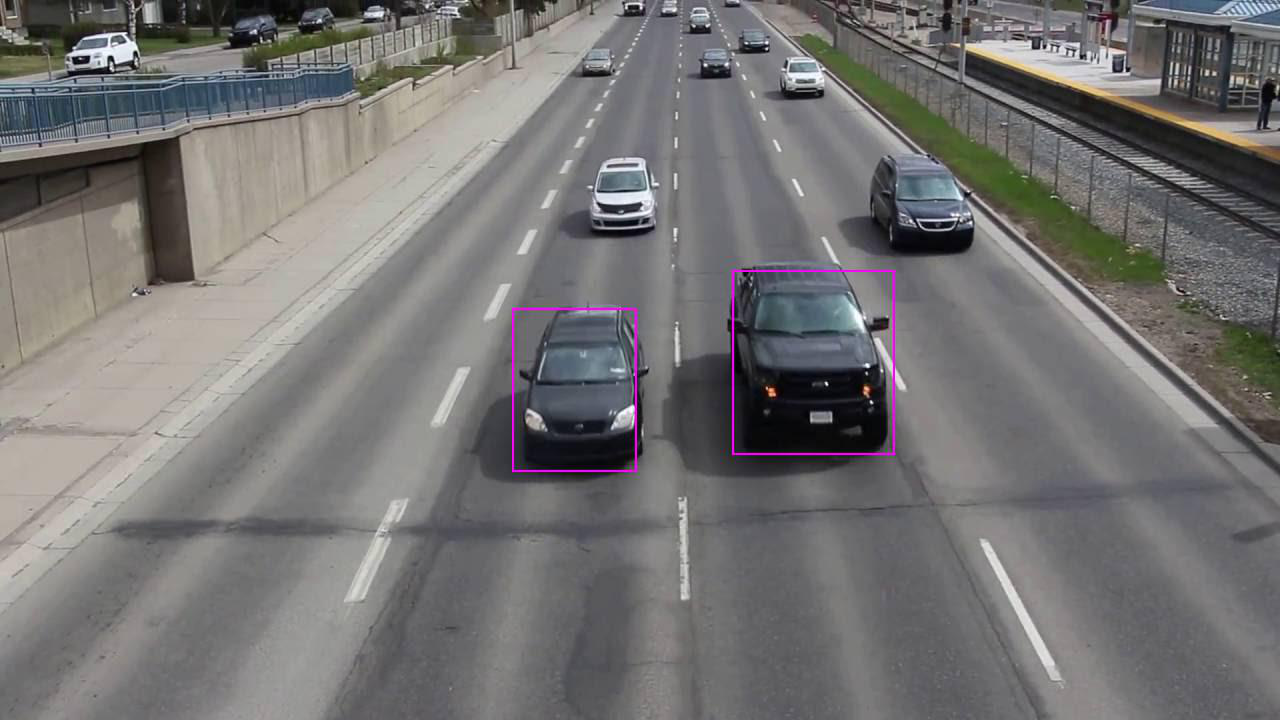

HxW: (720, 1280)


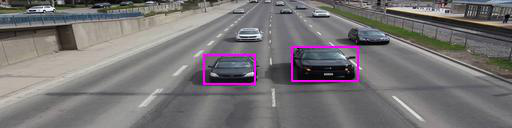

HxW: (128, 512)


In [69]:
from IPython.display import display
from PIL import Image


path = '/workspace/inferred_images/images_annotated/car001_720x1280.jpg'
image = Image.open(path)
display(image)
width, height = image.size
print("HxW: ({}, {})".format(height, width))

path = '/workspace/inferred_images/images_annotated/car001_128x512.jpg'
image = Image.open(path)
display(image)
width, height = image.size
print("HxW: ({}, {})".format(height, width))

## Pruning the model
As we have successfully trained our model, we can further prune our model to reduce it's size  
that will help to do faster inference and the model will become very lite aswell.

In [70]:
!tlt-prune -pm "/workspace/trained_model/model.step-9600.tlt" \
            -o "/workspace/pruned_model" -pth 0.30 -nf 16 -k $API_KEY

Using TensorFlow backend.
Instructions for updating:
Colocations handled automatically by placer.
2019-11-20 05:36:13,177 [WARNING] tensorflow: From /usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
2019-11-20 05:36:14.641340: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-11-20 05:36:16.142333: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x7da4ce0 executing computations on platform CUDA. Devices:
2019-11-20 05:36:16.142379: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2019-11-20 05:36:16.142388: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (1)

2019-11-20 05:36:18,626 [INFO] modulus.pruning.pruning: Pruning model and appending pruned nodes to new graph
2019-11-20 05:36:40,740 [INFO] iva.common.magnet_prune: Pruning ratio (pruned model / original model): 1.0


## Re-training the model
After pruning, our model might loose some accuracy to gain that accuracy again  
we need to retrain our model, so again we need to have: ``/workspace/retrain.txt``  
remember to add model path as your pruned model for ``pretrained_model_file``  
let's see what is inside it.

In [71]:
!cat /workspace/spec_files/retrain.txt

random_seed: 42
model_config {
  pretrained_model_file: "/workspace/pruned_model/resnet18_nopool_bn_detectnet_v2_pruned.tlt"
  num_layers: 18
  
  freeze_blocks: 0
  arch: "resnet"
  use_batch_norm: true
  activation {
    activation_type: "relu"
  }
  dropout_rate: 0.1
  objective_set: {
    cov {}
    bbox {
      scale: 35.0
      offset: 0.5
    }
  }
  training_precision {
    backend_floatx: FLOAT32
 }
}

bbox_rasterizer_config {
  target_class_config {
    key: "car"
    value: {
      cov_center_x: 0.5
      cov_center_y: 0.5
      cov_radius_x: 0.4
      cov_radius_y: 0.4
      bbox_min_radius: 1.0
    }
  }
  target_class_config {
    key: "pedestrian"
    value: {
      cov_center_x: 0.5
      cov_center_y: 0.5
      cov_radius_x: 1.0
      cov_radius_y: 1.0
      bbox_min_radius: 1.0
    }
  }
  target_class_config {
    key: "cyclist"
    value: {
      cov_center_x: 0.5
      cov_center_y: 0.5
      cov_radius_x: 1.0
      cov_radius_y: 1.0
      bbox_min_radius: 1.0
    

In [72]:
!tlt-train detectnet_v2 -e "/workspace/spec_files/retrain.txt" \
        -r "/workspace/retrained_model" --gpus 5 -k $API_KEY

Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
2019-11-20 05:45:04.097163: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-11-20 05:45:04.097996: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-11-20 05:45:04.098032: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-11-20 05:45:04.098026: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-11-20 05:45:04.098045: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


2019-11-20 05:45:12.832679: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x61773e0 executing computations on platform Host. Devices:
2019-11-20 05:45:12.832720: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-11-20 05:45:12.833555: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1433] Found device 0 with properties: 
name: Tesla V100-SXM2-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.53
pciBusID: 0000:85:00.0
totalMemory: 31.72GiB freeMemory: 30.21GiB
2019-11-20 05:45:12.833591: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 4
2019-11-20 05:45:12.929238: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-11-20 05:45:12.929265: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      3 
2019-11-20 05:45:12.929294: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 3:   N 
2019-11-20 05:

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
2019-11-20 05:45:13,046 [WARNING] tensorflow: From /usr/local/lib/python2.7/dist-packages/horovod/tensorflow/__init__.py:91: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
2019-11-20 05:45:13,101 [INFO] iva.detectnet_v2.scripts.train: Cannot iterate over exactly 6359 samples with a batch size of 16; each epoch will therefore take one extra step.
2019-11-20 05:45:13,101 [INFO] iva.detectnet_v2.scripts.train: Cannot iterate over exactly 79 steps per epoch with 16 processors; each processor will therefore take one extra step per epoch.
2019-11-20 05:45:13,102 [INFO] iva.detectnet_v2.scripts.train: Cannot iterate over exactly 6359 samples with a batch size of 16; each epoch will therefore take one extra step.
2019-11-20 05:45:13,103 [INFO] iva.detectnet_v2.scripts.train: Cannot iterate o

target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3, 128, 512)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 256)  9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 256)  256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 64, 64, 256)  0           bn_conv1[0][0]                   
___________

target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3, 128, 512)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 256)  9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 256)  256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 64, 64, 256)  0           bn_conv1[0][0]                   
___________

target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3, 128, 512)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 256)  9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 256)  256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1

target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3, 128, 512)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 256)  9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 256)  256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 64, 64, 256)  0           bn_conv1[0][0]                   
___________

target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is

target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
INFO:tensorflow:Graph was finalized.
2019-11-20 05:45:50,951 [INFO] tensorflow: Graph was finalized.
2019-11-20 05:45:50.952452: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 4
2019-11-20 05:45:50.952523: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-11-20 05:45:50.952553: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      4 
2019-11-20 05:45:50.952561: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 4:   N 
2019-11-20 05:45:50.953190: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 29392 MB memory) -> physical GPU (device: 4, name: Tesla V100-SXM2-32GB, pci bus id: 0000:85:

2019-11-20 05:48:05.280324: I tensorflow/stream_executor/dso_loader.cc:152] successfully opened CUDA library libcublas.so.10.0 locally
2019-11-20 05:48:05.626385: I tensorflow/core/kernels/cuda_solvers.cc:159] Creating CudaSolver handles for stream 0x7432090
INFO:tensorflow:epoch = 0.0, loss = 0.09580692, step = 0
2019-11-20 05:48:08,119 [INFO] tensorflow: epoch = 0.0, loss = 0.09580692, step = 0
INFO:tensorflow:epoch = 0.0, loss = 0.111364156, step = 0
2019-11-20 05:48:08,120 [INFO] tensorflow: epoch = 0.0, loss = 0.111364156, step = 0
INFO:tensorflow:epoch = 0.0, loss = 0.09586197, step = 0
2019-11-20 05:48:08,121 [INFO] tensorflow: epoch = 0.0, loss = 0.09586197, step = 0
INFO:tensorflow:epoch = 0.0, loss = 0.09425725, step = 0
2019-11-20 05:48:08,121 [INFO] tensorflow: epoch = 0.0, loss = 0.09425725, step = 0
2019-11-20 05:48:08,123 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 0/120: loss: 0.11136 Time taken: 0:00:00 E

INFO:tensorflow:global_step/sec: 5.98366
2019-11-20 05:50:03,921 [INFO] tensorflow: global_step/sec: 5.98366
INFO:tensorflow:global_step/sec: 6.11677
2019-11-20 05:50:05,229 [INFO] tensorflow: global_step/sec: 6.11677
2019-11-20 05:50:05,713 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 24.352
INFO:tensorflow:global_step/sec: 5.98841
2019-11-20 05:50:06,564 [INFO] tensorflow: global_step/sec: 5.98841
INFO:tensorflow:epoch = 1.4000000000000001, loss = 0.0024738535, step = 112 (5.295 sec)
2019-11-20 05:50:07,877 [INFO] tensorflow: epoch = 1.4000000000000001, loss = 0.0024738535, step = 112 (5.295 sec)
INFO:tensorflow:global_step/sec: 6.09131
2019-11-20 05:50:07,878 [INFO] tensorflow: global_step/sec: 6.09131
INFO:tensorflow:epoch = 1.4125, loss = 0.0015514403, step = 113 (5.282 sec)
2019-11-20 05:50:08,042 [INFO] tensorflow: epoch = 1.4125, loss = 0.0015514403, step = 113 (5.282 sec)
INFO:tensorflow:epoch = 1.4125, loss = 0

INFO:tensorflow:global_step/sec: 6.14225
2019-11-20 05:50:31,569 [INFO] tensorflow: global_step/sec: 6.14225
INFO:tensorflow:global_step/sec: 6.02964
2019-11-20 05:50:32,895 [INFO] tensorflow: global_step/sec: 6.02964
INFO:tensorflow:epoch = 3.4000000000000004, loss = 0.0018753696, step = 272 (5.247 sec)
2019-11-20 05:50:34,195 [INFO] tensorflow: epoch = 3.4000000000000004, loss = 0.0018753696, step = 272 (5.247 sec)
INFO:tensorflow:global_step/sec: 6.14737
2019-11-20 05:50:34,197 [INFO] tensorflow: global_step/sec: 6.14737
INFO:tensorflow:epoch = 3.4125, loss = 0.001912868, step = 273 (5.241 sec)
2019-11-20 05:50:34,360 [INFO] tensorflow: epoch = 3.4125, loss = 0.001912868, step = 273 (5.241 sec)
INFO:tensorflow:epoch = 3.4125, loss = 0.0014604541, step = 273 (5.241 sec)
2019-11-20 05:50:34,362 [INFO] tensorflow: epoch = 3.4125, loss = 0.0014604541, step = 273 (5.241 sec)
INFO:tensorflow:epoch = 3.4125, loss = 0.0015958614, step = 273 (5.242 sec)
2019-11-20 05:50:34,363 [INFO] tensorf

INFO:tensorflow:global_step/sec: 6.16633
2019-11-20 05:50:59,541 [INFO] tensorflow: global_step/sec: 6.16633
2019-11-20 05:50:59,542 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 494.927
INFO:tensorflow:epoch = 5.375, loss = 0.0013263372, step = 430 (5.189 sec)
2019-11-20 05:51:00,516 [INFO] tensorflow: epoch = 5.375, loss = 0.0013263372, step = 430 (5.189 sec)
INFO:tensorflow:epoch = 5.375, loss = 0.0021361427, step = 430 (5.187 sec)
INFO:tensorflow:epoch = 5.375, loss = 0.0015280333, step = 430 (5.187 sec)
2019-11-20 05:51:00,517 [INFO] tensorflow: epoch = 5.375, loss = 0.0021361427, step = 430 (5.187 sec)
2019-11-20 05:51:00,518 [INFO] tensorflow: epoch = 5.375, loss = 0.0015280333, step = 430 (5.187 sec)
INFO:tensorflow:epoch = 5.375, loss = 0.0013492855, step = 430 (5.187 sec)
INFO:tensorflow:epoch = 5.375, loss = 0.0014045935, step = 430 (5.188 sec)
2019-11-20 05:51:00,518 [INFO] tensorflow: epoch = 5.375, loss = 0.

INFO:tensorflow:epoch = 7.362500000000001, loss = 0.0013599008, step = 589 (5.259 sec)
2019-11-20 05:51:26,790 [INFO] tensorflow: epoch = 7.362500000000001, loss = 0.0013599008, step = 589 (5.259 sec)
INFO:tensorflow:epoch = 7.362500000000001, loss = 0.0013153193, step = 589 (5.259 sec)
INFO:tensorflow:epoch = 7.362500000000001, loss = 0.0012851853, step = 589 (5.258 sec)
INFO:tensorflow:epoch = 7.362500000000001, loss = 0.0013457437, step = 589 (5.258 sec)
2019-11-20 05:51:26,792 [INFO] tensorflow: epoch = 7.362500000000001, loss = 0.0013153193, step = 589 (5.259 sec)
INFO:tensorflow:epoch = 7.362500000000001, loss = 0.0011989333, step = 589 (5.258 sec)
2019-11-20 05:51:26,792 [INFO] tensorflow: epoch = 7.362500000000001, loss = 0.0012851853, step = 589 (5.258 sec)
2019-11-20 05:51:26,792 [INFO] tensorflow: epoch = 7.362500000000001, loss = 0.0013457437, step = 589 (5.258 sec)
2019-11-20 05:51:26,792 [INFO] tensorflow: epoch = 7.362500000000001, loss = 0.0011989333, step = 589 (5.258 

2019-11-20 05:51:53,185 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 480.772
INFO:tensorflow:global_step/sec: 5.78841
2019-11-20 05:51:53,694 [INFO] tensorflow: global_step/sec: 5.78841
INFO:tensorflow:global_step/sec: 6.08301
2019-11-20 05:51:55,009 [INFO] tensorflow: global_step/sec: 6.08301
INFO:tensorflow:global_step/sec: 5.96629
2019-11-20 05:51:56,350 [INFO] tensorflow: global_step/sec: 5.96629
2019-11-20 05:51:57,370 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 477.979
INFO:tensorflow:global_step/sec: 5.97793
2019-11-20 05:51:57,688 [INFO] tensorflow: global_step/sec: 5.97793
INFO:tensorflow:epoch = 9.7375, loss = 0.0013024061, step = 779 (5.170 sec)
INFO:tensorflow:epoch = 9.7375, loss = 0.0013924005, step = 779 (5.168 sec)
2019-11-20 05:51:58,161 [INFO] tensorflow: epoch = 9.7375, loss = 0.0013024061, step = 779 (5.170 sec)
2019-11-20 05:51:58,161

INFO:tensorflow:epoch = 11.012500000000001, loss = 0.0012716776, step = 881 (50.866 sec)
2019-11-20 05:53:04,875 [INFO] tensorflow: epoch = 11.012500000000001, loss = 0.0012716776, step = 881 (50.866 sec)
INFO:tensorflow:epoch = 11.012500000000001, loss = 0.0011887188, step = 881 (50.865 sec)
2019-11-20 05:53:04,876 [INFO] tensorflow: epoch = 11.012500000000001, loss = 0.0011887188, step = 881 (50.865 sec)
INFO:tensorflow:epoch = 11.012500000000001, loss = 0.001193304, step = 881 (51.050 sec)
INFO:tensorflow:epoch = 11.012500000000001, loss = 0.0012780736, step = 881 (51.050 sec)
2019-11-20 05:53:04,877 [INFO] tensorflow: epoch = 11.012500000000001, loss = 0.001193304, step = 881 (51.050 sec)
2019-11-20 05:53:04,877 [INFO] tensorflow: epoch = 11.012500000000001, loss = 0.0012780736, step = 881 (51.050 sec)
INFO:tensorflow:global_step/sec: 6.11136
2019-11-20 05:53:06,023 [INFO] tensorflow: global_step/sec: 6.11136
INFO:tensorflow:global_step/sec: 5.98176
2019-11-20 05:53:07,361 [INFO] t

INFO:tensorflow:global_step/sec: 6.01436
2019-11-20 05:53:32,382 [INFO] tensorflow: global_step/sec: 6.01436
2019-11-20 05:53:32,549 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 480.664
INFO:tensorflow:global_step/sec: 5.93631
2019-11-20 05:53:33,730 [INFO] tensorflow: global_step/sec: 5.93631
INFO:tensorflow:global_step/sec: 6.03992
2019-11-20 05:53:35,055 [INFO] tensorflow: global_step/sec: 6.03992
INFO:tensorflow:epoch = 13.387500000000001, loss = 0.0016950867, step = 1071 (5.180 sec)
2019-11-20 05:53:36,231 [INFO] tensorflow: epoch = 13.387500000000001, loss = 0.0016950867, step = 1071 (5.180 sec)
INFO:tensorflow:global_step/sec: 5.90813
2019-11-20 05:53:36,409 [INFO] tensorflow: global_step/sec: 5.90813
INFO:tensorflow:epoch = 13.412500000000001, loss = 0.0013025552, step = 1073 (5.338 sec)
2019-11-20 05:53:36,573 [INFO] tensorflow: epoch = 13.412500000000001, loss = 0.0013025552, step = 1073 (5.338 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 5.96489
2019-11-20 05:53:59,025 [INFO] tensorflow: global_step/sec: 5.96489
INFO:tensorflow:global_step/sec: 6.14453
2019-11-20 05:54:00,327 [INFO] tensorflow: global_step/sec: 6.14453
INFO:tensorflow:global_step/sec: 6.09436
2019-11-20 05:54:01,640 [INFO] tensorflow: global_step/sec: 6.09436
2019-11-20 05:54:01,641 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 485.425
INFO:tensorflow:epoch = 15.375, loss = 0.0013995403, step = 1230 (5.297 sec)
2019-11-20 05:54:02,651 [INFO] tensorflow: epoch = 15.375, loss = 0.0013995403, step = 1230 (5.297 sec)
INFO:tensorflow:epoch = 15.4, loss = 0.0012047417, step = 1232 (5.288 sec)
2019-11-20 05:54:02,967 [INFO] tensorflow: epoch = 15.4, loss = 0.0012047417, step = 1232 (5.288 sec)
INFO:tensorflow:epoch = 15.4, loss = 0.0010965603, step = 1232 (5.289 sec)
2019-11-20 05:54:02,970 [INFO] tensorflow: epoch = 15.4, loss = 0.0010965603, step = 1232 (5.289 

INFO:tensorflow:global_step/sec: 6.11284
2019-11-20 05:54:27,988 [INFO] tensorflow: global_step/sec: 6.11284
INFO:tensorflow:epoch = 17.375, loss = 0.0014529352, step = 1390 (5.276 sec)
2019-11-20 05:54:28,955 [INFO] tensorflow: epoch = 17.375, loss = 0.0014529352, step = 1390 (5.276 sec)
INFO:tensorflow:epoch = 17.400000000000002, loss = 0.001497915, step = 1392 (5.257 sec)
2019-11-20 05:54:29,278 [INFO] tensorflow: epoch = 17.400000000000002, loss = 0.001497915, step = 1392 (5.257 sec)
INFO:tensorflow:epoch = 17.400000000000002, loss = 0.001190206, step = 1392 (5.259 sec)
2019-11-20 05:54:29,279 [INFO] tensorflow: epoch = 17.400000000000002, loss = 0.001190206, step = 1392 (5.259 sec)
INFO:tensorflow:epoch = 17.400000000000002, loss = 0.0012179539, step = 1392 (5.260 sec)
2019-11-20 05:54:29,280 [INFO] tensorflow: epoch = 17.400000000000002, loss = 0.0012179539, step = 1392 (5.260 sec)
INFO:tensorflow:epoch = 17.400000000000002, loss = 0.001174734, step = 1392 (5.259 sec)
2019-11-20 

2019-11-20 05:54:55,333 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 478.217
INFO:tensorflow:epoch = 19.387500000000003, loss = 0.0011711107, step = 1551 (5.200 sec)
2019-11-20 05:54:55,649 [INFO] tensorflow: epoch = 19.387500000000003, loss = 0.0011711107, step = 1551 (5.200 sec)
INFO:tensorflow:epoch = 19.387500000000003, loss = 0.0011006924, step = 1551 (5.204 sec)
2019-11-20 05:54:55,650 [INFO] tensorflow: epoch = 19.387500000000003, loss = 0.0011006924, step = 1551 (5.204 sec)
INFO:tensorflow:epoch = 19.387500000000003, loss = 0.0011123663, step = 1551 (5.203 sec)
INFO:tensorflow:epoch = 19.387500000000003, loss = 0.0012343798, step = 1551 (5.201 sec)
2019-11-20 05:54:55,652 [INFO] tensorflow: epoch = 19.387500000000003, loss = 0.0011123663, step = 1551 (5.203 sec)
2019-11-20 05:54:55,653 [INFO] tensorflow: epoch = 19.387500000000003, loss = 0.0012343798, step = 1551 (5.201 sec)
INFO:tensorflow:global_step/sec: 5.98

INFO:tensorflow:global_step/sec: 6.11778
2019-11-20 05:56:07,030 [INFO] tensorflow: global_step/sec: 6.11778
INFO:tensorflow:global_step/sec: 6.25798
2019-11-20 05:56:08,308 [INFO] tensorflow: global_step/sec: 6.25798
2019-11-20 05:56:08,309 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 493.333
INFO:tensorflow:global_step/sec: 6.02715
2019-11-20 05:56:09,635 [INFO] tensorflow: global_step/sec: 6.02715
INFO:tensorflow:epoch = 23.0, loss = 0.0013698416, step = 1840 (5.236 sec)
2019-11-20 05:56:10,956 [INFO] tensorflow: epoch = 23.0, loss = 0.0013698416, step = 1840 (5.236 sec)
INFO:tensorflow:global_step/sec: 6.04979
2019-11-20 05:56:10,958 [INFO] tensorflow: global_step/sec: 6.04979
2019-11-20 05:56:10,959 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 23/120: loss: 0.00137 Time taken: 0:00:13.166114 ETA: 0:21:17.113058
INFO:tensorflow:epoch = 23.012500000000003

2019-11-20 05:56:32,975 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 488.920
INFO:tensorflow:global_step/sec: 6.17861
2019-11-20 05:56:33,296 [INFO] tensorflow: global_step/sec: 6.17861
INFO:tensorflow:global_step/sec: 6.13273
2019-11-20 05:56:34,600 [INFO] tensorflow: global_step/sec: 6.13273
INFO:tensorflow:global_step/sec: 5.48091
2019-11-20 05:56:36,060 [INFO] tensorflow: global_step/sec: 5.48091
INFO:tensorflow:epoch = 24.9875, loss = 0.0010531163, step = 1999 (5.200 sec)
2019-11-20 05:56:37,199 [INFO] tensorflow: epoch = 24.9875, loss = 0.0010531163, step = 1999 (5.200 sec)
2019-11-20 05:56:37,204 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 472.876
INFO:tensorflow:epoch = 25.0, loss = 0.0009756711, step = 2000 (5.203 sec)
2019-11-20 05:56:37,368 [INFO] tensorflow: epoch = 25.0, loss = 0.0009756711, step = 2000 (5.203 sec)
INFO:tensorflow:epoch = 25.

INFO:tensorflow:global_step/sec: 5.83815
2019-11-20 05:56:59,732 [INFO] tensorflow: global_step/sec: 5.83815
INFO:tensorflow:global_step/sec: 6.02582
2019-11-20 05:57:01,059 [INFO] tensorflow: global_step/sec: 6.02582
2019-11-20 05:57:01,866 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 479.805
INFO:tensorflow:global_step/sec: 6.01191
2019-11-20 05:57:02,390 [INFO] tensorflow: global_step/sec: 6.01191
INFO:tensorflow:epoch = 26.975, loss = 0.0011991333, step = 2158 (5.187 sec)
2019-11-20 05:57:03,379 [INFO] tensorflow: epoch = 26.975, loss = 0.0011991333, step = 2158 (5.187 sec)
INFO:tensorflow:epoch = 26.9875, loss = 0.000897566, step = 2159 (5.200 sec)
2019-11-20 05:57:03,559 [INFO] tensorflow: epoch = 26.9875, loss = 0.000897566, step = 2159 (5.200 sec)
INFO:tensorflow:epoch = 26.9875, loss = 0.0009390486, step = 2159 (5.202 sec)
2019-11-20 05:57:03,561 [INFO] tensorflow: epoch = 26.9875, loss = 0.0009390486, step = 21

INFO:tensorflow:global_step/sec: 6.18969
2019-11-20 05:57:26,179 [INFO] tensorflow: global_step/sec: 6.18969
2019-11-20 05:57:26,659 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 491.976
INFO:tensorflow:global_step/sec: 6.06949
2019-11-20 05:57:27,497 [INFO] tensorflow: global_step/sec: 6.06949
INFO:tensorflow:global_step/sec: 5.9889
2019-11-20 05:57:28,833 [INFO] tensorflow: global_step/sec: 5.9889
INFO:tensorflow:epoch = 28.962500000000002, loss = 0.000997852, step = 2317 (5.264 sec)
2019-11-20 05:57:29,669 [INFO] tensorflow: epoch = 28.962500000000002, loss = 0.000997852, step = 2317 (5.264 sec)
INFO:tensorflow:epoch = 28.975, loss = 0.00095350866, step = 2318 (5.264 sec)
2019-11-20 05:57:29,828 [INFO] tensorflow: epoch = 28.975, loss = 0.00095350866, step = 2318 (5.264 sec)
INFO:tensorflow:epoch = 28.975, loss = 0.00082955486, step = 2318 (5.265 sec)
2019-11-20 05:57:29,829 [INFO] tensorflow: epoch = 28.975, loss = 0.

INFO:tensorflow:global_step/sec: 6.04917
2019-11-20 05:57:52,056 [INFO] tensorflow: global_step/sec: 6.04917
2019-11-20 05:57:52,218 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 488.902
INFO:tensorflow:global_step/sec: 5.95857
2019-11-20 05:57:53,399 [INFO] tensorflow: global_step/sec: 5.95857
INFO:tensorflow:global_step/sec: 6.18413
2019-11-20 05:57:54,692 [INFO] tensorflow: global_step/sec: 6.18413
INFO:tensorflow:epoch = 30.900000000000002, loss = 0.0009781836, step = 2472 (5.243 sec)
2019-11-20 05:57:55,976 [INFO] tensorflow: epoch = 30.900000000000002, loss = 0.0009781836, step = 2472 (5.243 sec)
INFO:tensorflow:global_step/sec: 6.22963
2019-11-20 05:57:55,977 [INFO] tensorflow: global_step/sec: 6.22963
INFO:tensorflow:epoch = 30.9125, loss = 0.0009791458, step = 2473 (5.243 sec)
2019-11-20 05:57:56,140 [INFO] tensorflow: epoch = 30.9125, loss = 0.0009791458, step = 2473 (5.243 sec)
INFO:tensorflow:epoch = 30.9125, 

INFO:tensorflow:epoch = 32.2, loss = 0.00085725094, step = 2576 (5.289 sec)
2019-11-20 05:58:34,935 [INFO] tensorflow: epoch = 32.2, loss = 0.00085725094, step = 2576 (5.289 sec)
INFO:tensorflow:global_step/sec: 5.94909
2019-11-20 05:58:34,935 [INFO] tensorflow: global_step/sec: 5.94909
INFO:tensorflow:epoch = 32.2, loss = 0.0008754428, step = 2576 (5.287 sec)
2019-11-20 05:58:34,936 [INFO] tensorflow: epoch = 32.2, loss = 0.0008754428, step = 2576 (5.287 sec)
INFO:tensorflow:epoch = 32.2, loss = 0.0008753602, step = 2576 (5.297 sec)
2019-11-20 05:58:34,945 [INFO] tensorflow: epoch = 32.2, loss = 0.0008753602, step = 2576 (5.297 sec)
INFO:tensorflow:epoch = 32.2, loss = 0.0009194405, step = 2576 (5.298 sec)
2019-11-20 05:58:34,945 [INFO] tensorflow: epoch = 32.2, loss = 0.0009194405, step = 2576 (5.298 sec)
INFO:tensorflow:global_step/sec: 6.02969
2019-11-20 05:58:36,262 [INFO] tensorflow: global_step/sec: 6.02969
INFO:tensorflow:global_step/sec: 6.21596
2019-11-20 05:58:37,549 [INFO] 

INFO:tensorflow:global_step/sec: 5.99494
2019-11-20 05:59:01,351 [INFO] tensorflow: global_step/sec: 5.99494
INFO:tensorflow:global_step/sec: 5.85508
2019-11-20 05:59:02,717 [INFO] tensorflow: global_step/sec: 5.85508
2019-11-20 05:59:03,562 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 474.822
INFO:tensorflow:global_step/sec: 5.97795
2019-11-20 05:59:04,055 [INFO] tensorflow: global_step/sec: 5.97795
INFO:tensorflow:global_step/sec: 6.22482
2019-11-20 05:59:05,341 [INFO] tensorflow: global_step/sec: 6.22482
INFO:tensorflow:epoch = 34.575, loss = 0.0013414344, step = 2766 (5.310 sec)
2019-11-20 05:59:06,316 [INFO] tensorflow: epoch = 34.575, loss = 0.0013414344, step = 2766 (5.310 sec)
INFO:tensorflow:epoch = 34.5875, loss = 0.0008362987, step = 2767 (5.301 sec)
2019-11-20 05:59:06,478 [INFO] tensorflow: epoch = 34.5875, loss = 0.0008362987, step = 2767 (5.301 sec)
INFO:tensorflow:epoch = 34.5875, loss = 0.00075199537, st

2019-11-20 05:59:28,428 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 480.130
INFO:tensorflow:global_step/sec: 5.9907
2019-11-20 05:59:29,264 [INFO] tensorflow: global_step/sec: 5.9907
INFO:tensorflow:global_step/sec: 5.79894
2019-11-20 05:59:30,643 [INFO] tensorflow: global_step/sec: 5.79894
INFO:tensorflow:global_step/sec: 5.66448
2019-11-20 05:59:32,056 [INFO] tensorflow: global_step/sec: 5.66448
INFO:tensorflow:epoch = 36.550000000000004, loss = 0.0011654224, step = 2924 (5.254 sec)
2019-11-20 05:59:32,696 [INFO] tensorflow: epoch = 36.550000000000004, loss = 0.0011654224, step = 2924 (5.254 sec)
2019-11-20 05:59:32,696 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 468.658
INFO:tensorflow:epoch = 36.5625, loss = 0.00078793726, step = 2925 (5.259 sec)
2019-11-20 05:59:32,858 [INFO] tensorflow: epoch = 36.5625, loss = 0.00078793726, step = 2925 (5.259 sec)

INFO:tensorflow:global_step/sec: 5.97822
2019-11-20 05:59:55,678 [INFO] tensorflow: global_step/sec: 5.97822
INFO:tensorflow:global_step/sec: 6.24787
2019-11-20 05:59:56,958 [INFO] tensorflow: global_step/sec: 6.24787
2019-11-20 05:59:57,271 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 490.080
INFO:tensorflow:global_step/sec: 6.0794
2019-11-20 05:59:58,274 [INFO] tensorflow: global_step/sec: 6.0794
INFO:tensorflow:epoch = 38.550000000000004, loss = 0.0013804501, step = 3084 (5.271 sec)
2019-11-20 05:59:58,954 [INFO] tensorflow: epoch = 38.550000000000004, loss = 0.0013804501, step = 3084 (5.271 sec)
INFO:tensorflow:epoch = 38.5625, loss = 0.00092630135, step = 3085 (5.299 sec)
2019-11-20 05:59:59,141 [INFO] tensorflow: epoch = 38.5625, loss = 0.00092630135, step = 3085 (5.299 sec)
INFO:tensorflow:epoch = 38.5625, loss = 0.0009622617, step = 3085 (5.299 sec)
2019-11-20 05:59:59,141 [INFO] tensorflow: epoch = 38.5625, loss

INFO:tensorflow:global_step/sec: 6.01207
2019-11-20 06:00:21,908 [INFO] tensorflow: global_step/sec: 6.01207
INFO:tensorflow:global_step/sec: 6.1231
2019-11-20 06:00:23,214 [INFO] tensorflow: global_step/sec: 6.1231
2019-11-20 06:00:23,215 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 482.691
INFO:tensorflow:global_step/sec: 5.97009
2019-11-20 06:00:24,555 [INFO] tensorflow: global_step/sec: 5.97009
INFO:tensorflow:epoch = 40.45, loss = 0.0009880498, step = 3236 (5.324 sec)
2019-11-20 06:00:25,202 [INFO] tensorflow: epoch = 40.45, loss = 0.0009880498, step = 3236 (5.324 sec)
INFO:tensorflow:epoch = 40.462500000000006, loss = 0.0009933277, step = 3237 (5.324 sec)
2019-11-20 06:00:25,360 [INFO] tensorflow: epoch = 40.462500000000006, loss = 0.0009933277, step = 3237 (5.324 sec)
INFO:tensorflow:epoch = 40.462500000000006, loss = 0.00079255056, step = 3237 (5.324 sec)
2019-11-20 06:00:25,362 [INFO] tensorflow: epoch = 40.4625

2019-11-20 06:01:01,121 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 491.262
INFO:tensorflow:global_step/sec: 6.13052
2019-11-20 06:01:01,620 [INFO] tensorflow: global_step/sec: 6.13052
INFO:tensorflow:global_step/sec: 6.02853
2019-11-20 06:01:02,947 [INFO] tensorflow: global_step/sec: 6.02853
2019-11-20 06:01:02,949 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 42/120: loss: 0.00113 Time taken: 0:00:13.161156 ETA: 0:17:06.570168
INFO:tensorflow:global_step/sec: 6.20069
2019-11-20 06:01:04,238 [INFO] tensorflow: global_step/sec: 6.20069
2019-11-20 06:01:05,258 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 483.508
INFO:tensorflow:epoch = 42.2, loss = 0.00087488384, step = 3376 (5.265 sec)
2019-11-20 06:01:05,579 [INFO] tensorflow: epoch = 42.2, loss = 0.00087488384, step = 3376 (5.265 sec)
INFO:t

INFO:tensorflow:global_step/sec: 6.06404
2019-11-20 06:01:26,896 [INFO] tensorflow: global_step/sec: 6.06404
INFO:tensorflow:global_step/sec: 6.1541
2019-11-20 06:01:28,196 [INFO] tensorflow: global_step/sec: 6.1541
INFO:tensorflow:global_step/sec: 5.99698
2019-11-20 06:01:29,530 [INFO] tensorflow: global_step/sec: 5.99698
2019-11-20 06:01:29,531 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 44/120: loss: 0.00087 Time taken: 0:00:13.334175 ETA: 0:16:53.397300
2019-11-20 06:01:30,197 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 483.237
INFO:tensorflow:global_step/sec: 6.00987
2019-11-20 06:01:30,861 [INFO] tensorflow: global_step/sec: 6.00987
INFO:tensorflow:epoch = 44.1625, loss = 0.0011881607, step = 3533 (5.268 sec)
2019-11-20 06:01:31,676 [INFO] tensorflow: epoch = 44.1625, loss = 0.0011881607, step = 3533 (5.268 sec)
INFO:tensorflow:epoch = 44.17500000000

INFO:tensorflow:global_step/sec: 6.08644
2019-11-20 06:01:54,679 [INFO] tensorflow: global_step/sec: 6.08644
2019-11-20 06:01:54,998 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 484.673
INFO:tensorflow:global_step/sec: 6.11954
2019-11-20 06:01:55,986 [INFO] tensorflow: global_step/sec: 6.11954
2019-11-20 06:01:55,987 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 46/120: loss: 0.00097 Time taken: 0:00:13.084540 ETA: 0:16:08.255960
INFO:tensorflow:global_step/sec: 6.04648
2019-11-20 06:01:57,309 [INFO] tensorflow: global_step/sec: 6.04648
INFO:tensorflow:epoch = 46.1375, loss = 0.0009203921, step = 3691 (5.306 sec)
2019-11-20 06:01:57,849 [INFO] tensorflow: epoch = 46.1375, loss = 0.0009203921, step = 3691 (5.306 sec)
INFO:tensorflow:epoch = 46.150000000000006, loss = 0.0008957202, step = 3692 (5.302 sec)
2019-11-20 06:01:58,004 [INFO] tensorflow: epoch = 46.15

INFO:tensorflow:global_step/sec: 5.75112
2019-11-20 06:02:19,762 [INFO] tensorflow: global_step/sec: 5.75112
2019-11-20 06:02:19,764 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 469.071
INFO:tensorflow:global_step/sec: 5.67893
2019-11-20 06:02:21,171 [INFO] tensorflow: global_step/sec: 5.67893
INFO:tensorflow:global_step/sec: 5.77618
2019-11-20 06:02:22,556 [INFO] tensorflow: global_step/sec: 5.77618
2019-11-20 06:02:22,557 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 48/120: loss: 0.00097 Time taken: 0:00:13.469425 ETA: 0:16:09.798600
INFO:tensorflow:global_step/sec: 5.90675
2019-11-20 06:02:23,910 [INFO] tensorflow: global_step/sec: 5.90675
2019-11-20 06:02:24,076 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 463.809
INFO:tensorflow:epoch = 48.125, loss = 0.0011798008, step = 3850 (5.180 sec)

INFO:tensorflow:global_step/sec: 5.73264
2019-11-20 06:02:46,579 [INFO] tensorflow: global_step/sec: 5.73264
INFO:tensorflow:global_step/sec: 5.90618
2019-11-20 06:02:47,934 [INFO] tensorflow: global_step/sec: 5.90618
INFO:tensorflow:Saving checkpoints for step-4000.
2019-11-20 06:02:49,113 [INFO] tensorflow: Saving checkpoints for step-4000.
2019-11-20 06:02:49,759 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 406.990
INFO:tensorflow:global_step/sec: 3.98643
2019-11-20 06:02:49,941 [INFO] tensorflow: global_step/sec: 3.98643
2019-11-20 06:02:49,942 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 50/120: loss: 0.00101 Time taken: 0:00:14.146724 ETA: 0:16:30.270680
INFO:tensorflow:epoch = 50.0375, loss = 0.0011833138, step = 4003 (5.245 sec)
2019-11-20 06:02:50,428 [INFO] tensorflow: epoch = 50.0375, loss = 0.0011833138, step = 4003 (5.245 sec)
INFO:tensorflow:ep

INFO:tensorflow:epoch = 51.4125, loss = 0.0007356714, step = 4113 (5.343 sec)
2019-11-20 06:03:24,955 [INFO] tensorflow: epoch = 51.4125, loss = 0.0007356714, step = 4113 (5.343 sec)
INFO:tensorflow:epoch = 51.4125, loss = 0.0006789344, step = 4113 (5.347 sec)
2019-11-20 06:03:24,956 [INFO] tensorflow: epoch = 51.4125, loss = 0.0006789344, step = 4113 (5.347 sec)
INFO:tensorflow:epoch = 51.4125, loss = 0.0007803188, step = 4113 (5.346 sec)
2019-11-20 06:03:24,957 [INFO] tensorflow: epoch = 51.4125, loss = 0.0007803188, step = 4113 (5.346 sec)
INFO:tensorflow:epoch = 51.4125, loss = 0.00064306834, step = 4113 (5.346 sec)
2019-11-20 06:03:24,958 [INFO] tensorflow: epoch = 51.4125, loss = 0.00064306834, step = 4113 (5.346 sec)
INFO:tensorflow:global_step/sec: 5.70354
2019-11-20 06:03:26,185 [INFO] tensorflow: global_step/sec: 5.70354
2019-11-20 06:03:26,895 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 467.508
INFO:tensorflo

INFO:tensorflow:global_step/sec: 5.75472
2019-11-20 06:03:51,606 [INFO] tensorflow: global_step/sec: 5.75472
2019-11-20 06:03:51,924 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 470.937
INFO:tensorflow:global_step/sec: 6.13901
2019-11-20 06:03:52,909 [INFO] tensorflow: global_step/sec: 6.13901
INFO:tensorflow:global_step/sec: 6.02307
2019-11-20 06:03:54,238 [INFO] tensorflow: global_step/sec: 6.02307
INFO:tensorflow:global_step/sec: 6.18934
2019-11-20 06:03:55,530 [INFO] tensorflow: global_step/sec: 6.18934
2019-11-20 06:03:56,017 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 488.802
INFO:tensorflow:epoch = 53.7625, loss = 0.0010793868, step = 4301 (5.277 sec)
2019-11-20 06:03:56,336 [INFO] tensorflow: epoch = 53.7625, loss = 0.0010793868, step = 4301 (5.277 sec)
INFO:tensorflow:epoch = 53.775000000000006, loss = 0.0006421786, step = 4302 (5.275 sec)
2019-1

INFO:tensorflow:global_step/sec: 5.7627
2019-11-20 06:04:18,583 [INFO] tensorflow: global_step/sec: 5.7627
INFO:tensorflow:global_step/sec: 5.89072
2019-11-20 06:04:19,941 [INFO] tensorflow: global_step/sec: 5.89072
INFO:tensorflow:global_step/sec: 5.99368
2019-11-20 06:04:21,276 [INFO] tensorflow: global_step/sec: 5.99368
2019-11-20 06:04:21,437 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 471.561
INFO:tensorflow:global_step/sec: 6.21759
2019-11-20 06:04:22,562 [INFO] tensorflow: global_step/sec: 6.21759
INFO:tensorflow:epoch = 55.712500000000006, loss = 0.0011092003, step = 4457 (5.185 sec)
2019-11-20 06:04:22,726 [INFO] tensorflow: epoch = 55.712500000000006, loss = 0.0011092003, step = 4457 (5.185 sec)
INFO:tensorflow:epoch = 55.725, loss = 0.00076179614, step = 4458 (5.177 sec)
2019-11-20 06:04:22,886 [INFO] tensorflow: epoch = 55.725, loss = 0.00076179614, step = 4458 (5.177 sec)
INFO:tensorflow:epoch = 55.725, los

INFO:tensorflow:global_step/sec: 6.01846
2019-11-20 06:04:45,296 [INFO] tensorflow: global_step/sec: 6.01846
2019-11-20 06:04:46,449 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 481.090
INFO:tensorflow:global_step/sec: 6.08959
2019-11-20 06:04:46,609 [INFO] tensorflow: global_step/sec: 6.08959
INFO:tensorflow:global_step/sec: 5.86683
2019-11-20 06:04:47,973 [INFO] tensorflow: global_step/sec: 5.86683
INFO:tensorflow:epoch = 57.675000000000004, loss = 0.0011252426, step = 4614 (5.220 sec)
2019-11-20 06:04:49,021 [INFO] tensorflow: epoch = 57.675000000000004, loss = 0.0011252426, step = 4614 (5.220 sec)
INFO:tensorflow:epoch = 57.6875, loss = 0.00066378, step = 4615 (5.218 sec)
2019-11-20 06:04:49,181 [INFO] tensorflow: epoch = 57.6875, loss = 0.00066378, step = 4615 (5.218 sec)
INFO:tensorflow:epoch = 57.6875, loss = 0.000872915, step = 4615 (5.217 sec)
2019-11-20 06:04:49,181 [INFO] tensorflow: epoch = 57.6875, loss = 0.

2019-11-20 06:05:11,686 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 467.571
INFO:tensorflow:global_step/sec: 6.12115
2019-11-20 06:05:12,158 [INFO] tensorflow: global_step/sec: 6.12115
INFO:tensorflow:global_step/sec: 6.17418
2019-11-20 06:05:13,454 [INFO] tensorflow: global_step/sec: 6.17418
INFO:tensorflow:global_step/sec: 6.0337
2019-11-20 06:05:14,780 [INFO] tensorflow: global_step/sec: 6.0337
INFO:tensorflow:epoch = 59.625, loss = 0.0011774267, step = 4770 (5.250 sec)
2019-11-20 06:05:15,239 [INFO] tensorflow: epoch = 59.625, loss = 0.0011774267, step = 4770 (5.250 sec)
INFO:tensorflow:epoch = 59.6375, loss = 0.00069566467, step = 4771 (5.239 sec)
2019-11-20 06:05:15,398 [INFO] tensorflow: epoch = 59.6375, loss = 0.00069566467, step = 4771 (5.239 sec)
INFO:tensorflow:epoch = 59.6375, loss = 0.0006456352, step = 4771 (5.241 sec)
2019-11-20 06:05:15,400 [INFO] tensorflow: epoch = 59.6375, loss = 0.0006456352, step = 

INFO:tensorflow:epoch = 61.0125, loss = 0.0005788954, step = 4881 (19.206 sec)
2019-11-20 06:05:50,485 [INFO] tensorflow: epoch = 61.0125, loss = 0.0005788954, step = 4881 (19.206 sec)
INFO:tensorflow:epoch = 61.0125, loss = 0.0007000039, step = 4881 (19.210 sec)
2019-11-20 06:05:50,487 [INFO] tensorflow: epoch = 61.0125, loss = 0.0007000039, step = 4881 (19.210 sec)
INFO:tensorflow:epoch = 61.0125, loss = 0.00078090123, step = 4881 (19.214 sec)
2019-11-20 06:05:50,489 [INFO] tensorflow: epoch = 61.0125, loss = 0.00078090123, step = 4881 (19.214 sec)
INFO:tensorflow:epoch = 61.0125, loss = 0.00080020307, step = 4881 (19.211 sec)
2019-11-20 06:05:50,489 [INFO] tensorflow: epoch = 61.0125, loss = 0.00080020307, step = 4881 (19.211 sec)
INFO:tensorflow:global_step/sec: 5.96306
2019-11-20 06:05:51,657 [INFO] tensorflow: global_step/sec: 5.96306
INFO:tensorflow:global_step/sec: 6.113
2019-11-20 06:05:52,965 [INFO] tensorflow: global_step/sec: 6.113
2019-11-20 06:05:53,449 [INFO] /usr/local/

INFO:tensorflow:global_step/sec: 5.81508
2019-11-20 06:06:16,980 [INFO] tensorflow: global_step/sec: 5.81508
2019-11-20 06:06:16,981 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 63/120: loss: 0.00120 Time taken: 0:00:13.181241 ETA: 0:12:31.330737
INFO:tensorflow:global_step/sec: 6.0159
2019-11-20 06:06:18,310 [INFO] tensorflow: global_step/sec: 6.0159
2019-11-20 06:06:18,470 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 475.233
INFO:tensorflow:global_step/sec: 6.08646
2019-11-20 06:06:19,624 [INFO] tensorflow: global_step/sec: 6.08646
INFO:tensorflow:global_step/sec: 6.09651
2019-11-20 06:06:20,936 [INFO] tensorflow: global_step/sec: 6.09651
INFO:tensorflow:epoch = 63.362500000000004, loss = 0.00063410634, step = 5069 (5.185 sec)
2019-11-20 06:06:21,811 [INFO] tensorflow: epoch = 63.362500000000004, loss = 0.00063410634, step = 5069 (5.185 sec)
INFO:tensorflo

2019-11-20 06:06:43,776 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 480.240
INFO:tensorflow:global_step/sec: 6.07725
2019-11-20 06:06:43,946 [INFO] tensorflow: global_step/sec: 6.07725
2019-11-20 06:06:43,947 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 65/120: loss: 0.00123 Time taken: 0:00:13.454455 ETA: 0:12:19.995025
INFO:tensorflow:global_step/sec: 6.16383
2019-11-20 06:06:45,244 [INFO] tensorflow: global_step/sec: 6.16383
INFO:tensorflow:global_step/sec: 6.02545
2019-11-20 06:06:46,572 [INFO] tensorflow: global_step/sec: 6.02545
INFO:tensorflow:global_step/sec: 6.02931
2019-11-20 06:06:47,899 [INFO] tensorflow: global_step/sec: 6.02931
2019-11-20 06:06:47,899 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 485.221
INFO:tensorflow:epoch = 65.3125, loss = 0.00072064396, step = 5225 (5.265 se

INFO:tensorflow:global_step/sec: 5.59012
2019-11-20 06:07:10,855 [INFO] tensorflow: global_step/sec: 5.59012
2019-11-20 06:07:10,856 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 67/120: loss: 0.00141 Time taken: 0:00:13.700887 ETA: 0:12:06.147011
INFO:tensorflow:global_step/sec: 5.67792
2019-11-20 06:07:12,264 [INFO] tensorflow: global_step/sec: 5.67792
2019-11-20 06:07:13,343 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 448.682
INFO:tensorflow:global_step/sec: 5.58838
2019-11-20 06:07:13,696 [INFO] tensorflow: global_step/sec: 5.58838
INFO:tensorflow:epoch = 67.25, loss = 0.00050534954, step = 5380 (5.336 sec)
2019-11-20 06:07:14,403 [INFO] tensorflow: epoch = 67.25, loss = 0.00050534954, step = 5380 (5.336 sec)
INFO:tensorflow:epoch = 67.25, loss = 0.00071174686, step = 5380 (5.337 sec)
2019-11-20 06:07:14,404 [INFO] tensorflow: epoch = 67.25, loss = 0.000

2019-11-20 06:07:38,491 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 474.111
INFO:tensorflow:global_step/sec: 5.92984
2019-11-20 06:07:39,156 [INFO] tensorflow: global_step/sec: 5.92984
INFO:tensorflow:global_step/sec: 5.9663
2019-11-20 06:07:40,497 [INFO] tensorflow: global_step/sec: 5.9663
INFO:tensorflow:epoch = 69.2125, loss = 0.0006984356, step = 5537 (5.245 sec)
2019-11-20 06:07:40,674 [INFO] tensorflow: epoch = 69.2125, loss = 0.0006984356, step = 5537 (5.245 sec)
INFO:tensorflow:epoch = 69.2125, loss = 0.0007712746, step = 5537 (5.244 sec)
2019-11-20 06:07:40,676 [INFO] tensorflow: epoch = 69.2125, loss = 0.0007712746, step = 5537 (5.244 sec)
INFO:tensorflow:epoch = 69.2125, loss = 0.0006217206, step = 5537 (5.244 sec)
INFO:tensorflow:epoch = 69.2125, loss = 0.0011941124, step = 5537 (5.244 sec)
2019-11-20 06:07:40,677 [INFO] tensorflow: epoch = 69.2125, loss = 0.0006217206, step = 5537 (5.244 sec)
2019-11-20 06:

2019-11-20 06:08:10,295 [INFO] iva.detectnet_v2.evaluation.evaluation: step 30 / 70, 0.18s/step
2019-11-20 06:08:12,155 [INFO] iva.detectnet_v2.evaluation.evaluation: step 40 / 70, 0.19s/step
2019-11-20 06:08:13,891 [INFO] iva.detectnet_v2.evaluation.evaluation: step 50 / 70, 0.17s/step
2019-11-20 06:08:15,629 [INFO] iva.detectnet_v2.evaluation.evaluation: step 60 / 70, 0.17s/step
Matching predictions to ground truth, class 1/3.: 100% 20881/20881 [00:01<00:00, 11466.64it/s]
Matching predictions to ground truth, class 2/3.: 100% 1462/1462 [00:00<00:00, 8833.51it/s] 
Matching predictions to ground truth, class 3/3.: 100% 313/313 [00:00<00:00, 9605.04it/s]
Epoch 71/120

Validation cost: 0.000592
Mean average_precision (in %): 22.0610

class name      average precision (in %)
------------  --------------------------
car                              38.8602
cyclist                           1.2987
pedestrian                       26.0241

Median Inference Time: 0.005863
INFO:tensorflow:epoc

INFO:tensorflow:global_step/sec: 6.02026
2019-11-20 06:08:41,339 [INFO] tensorflow: global_step/sec: 6.02026
INFO:tensorflow:global_step/sec: 6.24812
2019-11-20 06:08:42,619 [INFO] tensorflow: global_step/sec: 6.24812
INFO:tensorflow:global_step/sec: 6.02774
2019-11-20 06:08:43,946 [INFO] tensorflow: global_step/sec: 6.02774
2019-11-20 06:08:43,948 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 487.995
INFO:tensorflow:global_step/sec: 6.14725
2019-11-20 06:08:45,248 [INFO] tensorflow: global_step/sec: 6.14725
INFO:tensorflow:epoch = 72.9625, loss = 0.0011158304, step = 5837 (5.213 sec)
2019-11-20 06:08:46,060 [INFO] tensorflow: epoch = 72.9625, loss = 0.0011158304, step = 5837 (5.213 sec)
INFO:tensorflow:epoch = 72.97500000000001, loss = 0.0007342255, step = 5838 (5.215 sec)
2019-11-20 06:08:46,231 [INFO] tensorflow: epoch = 72.97500000000001, loss = 0.0007342255, step = 5838 (5.215 sec)
INFO:tensorflow:epoch = 72.97500000

INFO:tensorflow:global_step/sec: 5.59715
2019-11-20 06:09:07,847 [INFO] tensorflow: global_step/sec: 5.59715
2019-11-20 06:09:08,846 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 475.418
INFO:tensorflow:global_step/sec: 6.06562
2019-11-20 06:09:09,166 [INFO] tensorflow: global_step/sec: 6.06562
INFO:tensorflow:global_step/sec: 6.2951
2019-11-20 06:09:10,437 [INFO] tensorflow: global_step/sec: 6.2951
INFO:tensorflow:global_step/sec: 5.91386
2019-11-20 06:09:11,789 [INFO] tensorflow: global_step/sec: 5.91386
INFO:tensorflow:epoch = 74.95, loss = 0.0010441447, step = 5996 (5.281 sec)
2019-11-20 06:09:12,461 [INFO] tensorflow: epoch = 74.95, loss = 0.0010441447, step = 5996 (5.281 sec)
INFO:tensorflow:epoch = 74.9625, loss = 0.00064172625, step = 5997 (5.289 sec)
INFO:tensorflow:epoch = 74.9625, loss = 0.0007297717, step = 5997 (5.289 sec)
2019-11-20 06:09:12,629 [INFO] tensorflow: epoch = 74.9625, loss = 0.00064172625, step 

INFO:tensorflow:global_step/sec: 5.91629
2019-11-20 06:09:34,588 [INFO] tensorflow: global_step/sec: 5.91629
INFO:tensorflow:global_step/sec: 5.9765
2019-11-20 06:09:35,926 [INFO] tensorflow: global_step/sec: 5.9765
INFO:tensorflow:global_step/sec: 6.0612
2019-11-20 06:09:37,246 [INFO] tensorflow: global_step/sec: 6.0612
2019-11-20 06:09:38,063 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 484.149
INFO:tensorflow:epoch = 76.9, loss = 0.0011692728, step = 6152 (5.169 sec)
2019-11-20 06:09:38,578 [INFO] tensorflow: epoch = 76.9, loss = 0.0011692728, step = 6152 (5.169 sec)
INFO:tensorflow:global_step/sec: 6.00405
2019-11-20 06:09:38,579 [INFO] tensorflow: global_step/sec: 6.00405
INFO:tensorflow:epoch = 76.9375, loss = 0.0005583239, step = 6155 (5.323 sec)
2019-11-20 06:09:39,076 [INFO] tensorflow: epoch = 76.9375, loss = 0.0005583239, step = 6155 (5.323 sec)
INFO:tensorflow:epoch = 76.9375, loss = 0.00075670425, step = 615

INFO:tensorflow:global_step/sec: 6.36403
2019-11-20 06:10:02,688 [INFO] tensorflow: global_step/sec: 6.36403
2019-11-20 06:10:03,166 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 492.631
INFO:tensorflow:global_step/sec: 6.1404
2019-11-20 06:10:03,991 [INFO] tensorflow: global_step/sec: 6.1404
INFO:tensorflow:epoch = 78.85000000000001, loss = 0.0011715749, step = 6308 (5.227 sec)
2019-11-20 06:10:04,669 [INFO] tensorflow: epoch = 78.85000000000001, loss = 0.0011715749, step = 6308 (5.227 sec)
INFO:tensorflow:epoch = 78.8875, loss = 0.00065344013, step = 6311 (5.226 sec)
2019-11-20 06:10:05,168 [INFO] tensorflow: epoch = 78.8875, loss = 0.00065344013, step = 6311 (5.226 sec)
INFO:tensorflow:epoch = 78.8875, loss = 0.0006028969, step = 6311 (5.228 sec)
INFO:tensorflow:epoch = 78.8875, loss = 0.00068654947, step = 6311 (5.227 sec)
2019-11-20 06:10:05,171 [INFO] tensorflow: epoch = 78.8875, loss = 0.0006028969, step = 6311 (5.

INFO:tensorflow:global_step/sec: 5.78932
2019-11-20 06:10:28,720 [INFO] tensorflow: global_step/sec: 5.78932
2019-11-20 06:10:28,881 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 475.439
INFO:tensorflow:global_step/sec: 5.9273
2019-11-20 06:10:30,070 [INFO] tensorflow: global_step/sec: 5.9273
INFO:tensorflow:epoch = 80.775, loss = 0.0011098885, step = 6462 (5.325 sec)
2019-11-20 06:10:31,145 [INFO] tensorflow: epoch = 80.775, loss = 0.0011098885, step = 6462 (5.325 sec)
INFO:tensorflow:epoch = 80.80000000000001, loss = 0.0005567625, step = 6464 (5.351 sec)
2019-11-20 06:10:31,499 [INFO] tensorflow: epoch = 80.80000000000001, loss = 0.0005567625, step = 6464 (5.351 sec)
INFO:tensorflow:epoch = 80.80000000000001, loss = 0.00062875205, step = 6464 (5.349 sec)
INFO:tensorflow:epoch = 80.80000000000001, loss = 0.00060334825, step = 6464 (5.347 sec)
2019-11-20 06:10:31,500 [INFO] tensorflow: epoch = 80.80000000000001, loss = 0.

2019-11-20 06:11:07,601 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 452.456
INFO:tensorflow:global_step/sec: 5.65729
2019-11-20 06:11:07,953 [INFO] tensorflow: global_step/sec: 5.65729
INFO:tensorflow:global_step/sec: 5.5989
2019-11-20 06:11:09,382 [INFO] tensorflow: global_step/sec: 5.5989
INFO:tensorflow:global_step/sec: 5.63445
2019-11-20 06:11:10,802 [INFO] tensorflow: global_step/sec: 5.63445
2019-11-20 06:11:12,026 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 452.007
INFO:tensorflow:global_step/sec: 5.71374
2019-11-20 06:11:12,202 [INFO] tensorflow: global_step/sec: 5.71374
INFO:tensorflow:epoch = 82.525, loss = 0.0010550928, step = 6602 (5.309 sec)
2019-11-20 06:11:12,555 [INFO] tensorflow: epoch = 82.525, loss = 0.0010550928, step = 6602 (5.309 sec)
INFO:tensorflow:epoch = 82.53750000000001, loss = 0.0005974663, step = 6603 (5.317 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 5.87259
2019-11-20 06:11:34,173 [INFO] tensorflow: global_step/sec: 5.87259
INFO:tensorflow:global_step/sec: 6.09632
2019-11-20 06:11:35,485 [INFO] tensorflow: global_step/sec: 6.09632
INFO:tensorflow:global_step/sec: 5.88211
2019-11-20 06:11:36,845 [INFO] tensorflow: global_step/sec: 5.88211
2019-11-20 06:11:37,697 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 475.960
INFO:tensorflow:global_step/sec: 5.83703
2019-11-20 06:11:38,216 [INFO] tensorflow: global_step/sec: 5.83703
INFO:tensorflow:epoch = 84.4375, loss = 0.0014105475, step = 6755 (5.239 sec)
2019-11-20 06:11:38,733 [INFO] tensorflow: epoch = 84.4375, loss = 0.0014105475, step = 6755 (5.239 sec)
INFO:tensorflow:epoch = 84.45, loss = 0.00064611796, step = 6756 (5.372 sec)
2019-11-20 06:11:39,035 [INFO] tensorflow: epoch = 84.45, loss = 0.00064611796, step = 6756 (5.372 sec)
INFO:tensorflow:epoch = 84.45, loss = 0.00067492266, step

INFO:tensorflow:global_step/sec: 5.72973
2019-11-20 06:12:02,573 [INFO] tensorflow: global_step/sec: 5.72973
2019-11-20 06:12:03,101 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 461.846
INFO:tensorflow:global_step/sec: 5.66111
2019-11-20 06:12:03,986 [INFO] tensorflow: global_step/sec: 5.66111
INFO:tensorflow:epoch = 86.375, loss = 0.0011366626, step = 6910 (5.232 sec)
2019-11-20 06:12:05,038 [INFO] tensorflow: epoch = 86.375, loss = 0.0011366626, step = 6910 (5.232 sec)
INFO:tensorflow:epoch = 86.3875, loss = 0.00058878446, step = 6911 (5.225 sec)
2019-11-20 06:12:05,209 [INFO] tensorflow: epoch = 86.3875, loss = 0.00058878446, step = 6911 (5.225 sec)
INFO:tensorflow:epoch = 86.3875, loss = 0.00068820047, step = 6911 (5.228 sec)
2019-11-20 06:12:05,211 [INFO] tensorflow: epoch = 86.3875, loss = 0.00068820047, step = 6911 (5.228 sec)
INFO:tensorflow:epoch = 86.3875, loss = 0.00062762166, step = 6911 (5.227 sec)
2019-11-2

INFO:tensorflow:global_step/sec: 6.06196
2019-11-20 06:12:29,472 [INFO] tensorflow: global_step/sec: 6.06196
INFO:tensorflow:global_step/sec: 6.08126
2019-11-20 06:12:30,788 [INFO] tensorflow: global_step/sec: 6.08126
INFO:tensorflow:epoch = 88.3375, loss = 0.00088597636, step = 7067 (5.296 sec)
2019-11-20 06:12:31,302 [INFO] tensorflow: epoch = 88.3375, loss = 0.00088597636, step = 7067 (5.296 sec)
INFO:tensorflow:epoch = 88.35000000000001, loss = 0.000538582, step = 7068 (5.296 sec)
2019-11-20 06:12:31,474 [INFO] tensorflow: epoch = 88.35000000000001, loss = 0.000538582, step = 7068 (5.296 sec)
INFO:tensorflow:epoch = 88.35000000000001, loss = 0.00047106098, step = 7068 (5.298 sec)
INFO:tensorflow:epoch = 88.35000000000001, loss = 0.00066142913, step = 7068 (5.300 sec)
2019-11-20 06:12:31,477 [INFO] tensorflow: epoch = 88.35000000000001, loss = 0.00047106098, step = 7068 (5.298 sec)
2019-11-20 06:12:31,477 [INFO] tensorflow: epoch = 88.35000000000001, loss = 0.00066142913, step = 706

INFO:tensorflow:global_step/sec: 6.2218
2019-11-20 06:12:55,803 [INFO] tensorflow: global_step/sec: 6.2218
INFO:tensorflow:global_step/sec: 5.91193
2019-11-20 06:12:57,156 [INFO] tensorflow: global_step/sec: 5.91193
INFO:tensorflow:epoch = 90.22500000000001, loss = 0.000985053, step = 7218 (5.274 sec)
2019-11-20 06:12:57,493 [INFO] tensorflow: epoch = 90.22500000000001, loss = 0.000985053, step = 7218 (5.274 sec)
INFO:tensorflow:epoch = 90.23750000000001, loss = 0.00045277202, step = 7219 (5.253 sec)
2019-11-20 06:12:57,656 [INFO] tensorflow: epoch = 90.23750000000001, loss = 0.00045277202, step = 7219 (5.253 sec)
INFO:tensorflow:epoch = 90.23750000000001, loss = 0.0004920028, step = 7219 (5.256 sec)
2019-11-20 06:12:57,659 [INFO] tensorflow: epoch = 90.23750000000001, loss = 0.0004920028, step = 7219 (5.256 sec)
INFO:tensorflow:epoch = 90.23750000000001, loss = 0.0004720582, step = 7219 (5.250 sec)
2019-11-20 06:12:57,659 [INFO] tensorflow: epoch = 90.23750000000001, loss = 0.00047205

INFO:tensorflow:global_step/sec: 6.09605
2019-11-20 06:13:34,277 [INFO] tensorflow: global_step/sec: 6.09605
2019-11-20 06:13:35,117 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 474.980
INFO:tensorflow:global_step/sec: 5.87614
2019-11-20 06:13:35,638 [INFO] tensorflow: global_step/sec: 5.87614
INFO:tensorflow:global_step/sec: 6.01689
2019-11-20 06:13:36,968 [INFO] tensorflow: global_step/sec: 6.01689
2019-11-20 06:13:36,969 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 92/120: loss: 0.00106 Time taken: 0:00:13.584635 ETA: 0:06:20.369780
INFO:tensorflow:global_step/sec: 6.12747
2019-11-20 06:13:38,273 [INFO] tensorflow: global_step/sec: 6.12747
INFO:tensorflow:epoch = 92.17500000000001, loss = 0.0009649461, step = 7374 (5.272 sec)
2019-11-20 06:13:39,222 [INFO] tensorflow: epoch = 92.17500000000001, loss = 0.0009649461, step = 7374 (5.272 sec)
2019-11-20 06:13

INFO:tensorflow:global_step/sec: 5.74216
2019-11-20 06:14:01,452 [INFO] tensorflow: global_step/sec: 5.74216
INFO:tensorflow:global_step/sec: 5.58211
2019-11-20 06:14:02,885 [INFO] tensorflow: global_step/sec: 5.58211
INFO:tensorflow:global_step/sec: 5.67215
2019-11-20 06:14:04,296 [INFO] tensorflow: global_step/sec: 5.67215
2019-11-20 06:14:04,297 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 94/120: loss: 0.00118 Time taken: 0:00:13.848401 ETA: 0:06:00.058426
2019-11-20 06:14:04,978 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 454.424
INFO:tensorflow:epoch = 94.0875, loss = 0.0011271139, step = 7527 (5.245 sec)
2019-11-20 06:14:05,478 [INFO] tensorflow: epoch = 94.0875, loss = 0.0011271139, step = 7527 (5.245 sec)
INFO:tensorflow:epoch = 94.10000000000001, loss = 0.0003881565, step = 7528 (5.245 sec)
2019-11-20 06:14:05,648 [INFO] tensorflow: epoch = 94.100

INFO:tensorflow:global_step/sec: 6.14068
2019-11-20 06:14:26,968 [INFO] tensorflow: global_step/sec: 6.14068
INFO:tensorflow:global_step/sec: 5.80215
2019-11-20 06:14:28,347 [INFO] tensorflow: global_step/sec: 5.80215
INFO:tensorflow:global_step/sec: 6.1424
2019-11-20 06:14:29,649 [INFO] tensorflow: global_step/sec: 6.1424
2019-11-20 06:14:29,962 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 483.506
INFO:tensorflow:global_step/sec: 6.22119
2019-11-20 06:14:30,935 [INFO] tensorflow: global_step/sec: 6.22119
2019-11-20 06:14:30,936 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 96/120: loss: 0.00099 Time taken: 0:00:13.143454 ETA: 0:05:15.442896
INFO:tensorflow:epoch = 96.0625, loss = 0.0010006728, step = 7685 (5.272 sec)
2019-11-20 06:14:31,745 [INFO] tensorflow: epoch = 96.0625, loss = 0.0010006728, step = 7685 (5.272 sec)
INFO:tensorflow:epoch = 96.075, loss =

INFO:tensorflow:global_step/sec: 6.13056
2019-11-20 06:14:54,729 [INFO] tensorflow: global_step/sec: 6.13056
2019-11-20 06:14:54,730 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 494.540
INFO:tensorflow:global_step/sec: 6.20125
2019-11-20 06:14:56,019 [INFO] tensorflow: global_step/sec: 6.20125
INFO:tensorflow:global_step/sec: 6.06965
2019-11-20 06:14:57,337 [INFO] tensorflow: global_step/sec: 6.06965
2019-11-20 06:14:57,338 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 98/120: loss: 0.00100 Time taken: 0:00:13.102517 ETA: 0:04:48.255374
INFO:tensorflow:epoch = 98.05000000000001, loss = 0.00046001325, step = 7844 (5.203 sec)
2019-11-20 06:14:57,980 [INFO] tensorflow: epoch = 98.05000000000001, loss = 0.00046001325, step = 7844 (5.203 sec)
INFO:tensorflow:epoch = 98.05000000000001, loss = 0.00042275465, step = 7844 (5.202 sec)
2019-11-20 06:14:57,983 [INFO] ten

2019-11-20 06:15:19,988 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 455.045
INFO:tensorflow:global_step/sec: 5.66467
2019-11-20 06:15:20,347 [INFO] tensorflow: global_step/sec: 5.66467
INFO:tensorflow:global_step/sec: 5.5436
2019-11-20 06:15:21,790 [INFO] tensorflow: global_step/sec: 5.5436
INFO:tensorflow:global_step/sec: 5.38036
2019-11-20 06:15:23,277 [INFO] tensorflow: global_step/sec: 5.38036
INFO:tensorflow:epoch = 99.97500000000001, loss = 0.00046409672, step = 7998 (5.236 sec)
2019-11-20 06:15:24,350 [INFO] tensorflow: epoch = 99.97500000000001, loss = 0.00046409672, step = 7998 (5.236 sec)
INFO:tensorflow:epoch = 99.97500000000001, loss = 0.0009752298, step = 7998 (5.237 sec)
2019-11-20 06:15:24,352 [INFO] tensorflow: epoch = 99.97500000000001, loss = 0.0009752298, step = 7998 (5.237 sec)
INFO:tensorflow:epoch = 99.97500000000001, loss = 0.00044675177, step = 7998 (5.239 sec)
2019-11-20 06:15:24,353 [INFO] tens

INFO:tensorflow:global_step/sec: 5.8312
2019-11-20 06:15:56,209 [INFO] tensorflow: global_step/sec: 5.8312
INFO:tensorflow:epoch = 101.3875, loss = 0.00093163917, step = 8111 (5.242 sec)
2019-11-20 06:15:57,367 [INFO] tensorflow: epoch = 101.3875, loss = 0.00093163917, step = 8111 (5.242 sec)
INFO:tensorflow:epoch = 101.4, loss = 0.00045343657, step = 8112 (5.232 sec)
2019-11-20 06:15:57,528 [INFO] tensorflow: epoch = 101.4, loss = 0.00045343657, step = 8112 (5.232 sec)
INFO:tensorflow:epoch = 101.4, loss = 0.0005814256, step = 8112 (5.231 sec)
2019-11-20 06:15:57,530 [INFO] tensorflow: epoch = 101.4, loss = 0.0005814256, step = 8112 (5.231 sec)
INFO:tensorflow:epoch = 101.4, loss = 0.00044244842, step = 8112 (5.231 sec)
2019-11-20 06:15:57,531 [INFO] tensorflow: epoch = 101.4, loss = 0.00044244842, step = 8112 (5.231 sec)
INFO:tensorflow:global_step/sec: 6.0493
2019-11-20 06:15:57,532 [INFO] tensorflow: global_step/sec: 6.0493
INFO:tensorflow:epoch = 101.4, loss = 0.00045139398, step 

INFO:tensorflow:epoch = 103.325, loss = 0.00089384965, step = 8266 (5.213 sec)
2019-11-20 06:16:23,508 [INFO] tensorflow: epoch = 103.325, loss = 0.00089384965, step = 8266 (5.213 sec)
INFO:tensorflow:epoch = 103.3375, loss = 0.0005876261, step = 8267 (5.213 sec)
INFO:tensorflow:epoch = 103.3375, loss = 0.000443545, step = 8267 (5.210 sec)
2019-11-20 06:16:23,680 [INFO] tensorflow: epoch = 103.3375, loss = 0.0005876261, step = 8267 (5.213 sec)
2019-11-20 06:16:23,680 [INFO] tensorflow: epoch = 103.3375, loss = 0.000443545, step = 8267 (5.210 sec)
INFO:tensorflow:epoch = 103.3375, loss = 0.00041039236, step = 8267 (5.211 sec)
2019-11-20 06:16:23,681 [INFO] tensorflow: epoch = 103.3375, loss = 0.00041039236, step = 8267 (5.211 sec)
INFO:tensorflow:epoch = 103.3375, loss = 0.00058656314, step = 8267 (5.213 sec)
2019-11-20 06:16:23,684 [INFO] tensorflow: epoch = 103.3375, loss = 0.00058656314, step = 8267 (5.213 sec)
INFO:tensorflow:global_step/sec: 5.86394
2019-11-20 06:16:24,550 [INFO] t

INFO:tensorflow:epoch = 105.3125, loss = 0.00044093863, step = 8425 (5.304 sec)
2019-11-20 06:16:49,977 [INFO] tensorflow: epoch = 105.3125, loss = 0.00044093863, step = 8425 (5.304 sec)
INFO:tensorflow:epoch = 105.3125, loss = 0.0005030259, step = 8425 (5.306 sec)
2019-11-20 06:16:49,978 [INFO] tensorflow: epoch = 105.3125, loss = 0.0005030259, step = 8425 (5.306 sec)
INFO:tensorflow:epoch = 105.3125, loss = 0.0003836915, step = 8425 (5.307 sec)
2019-11-20 06:16:49,979 [INFO] tensorflow: epoch = 105.3125, loss = 0.0003836915, step = 8425 (5.307 sec)
INFO:tensorflow:epoch = 105.3125, loss = 0.000539844, step = 8425 (5.308 sec)
2019-11-20 06:16:49,982 [INFO] tensorflow: epoch = 105.3125, loss = 0.000539844, step = 8425 (5.308 sec)
INFO:tensorflow:global_step/sec: 5.85458
2019-11-20 06:16:51,178 [INFO] tensorflow: global_step/sec: 5.85458
INFO:tensorflow:global_step/sec: 5.82759
2019-11-20 06:16:52,551 [INFO] tensorflow: global_step/sec: 5.82759
INFO:tensorflow:global_step/sec: 6.21431
2

INFO:tensorflow:global_step/sec: 5.75528
2019-11-20 06:17:16,700 [INFO] tensorflow: global_step/sec: 5.75528
INFO:tensorflow:global_step/sec: 5.90872
2019-11-20 06:17:18,054 [INFO] tensorflow: global_step/sec: 5.90872
2019-11-20 06:17:19,208 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 472.796
INFO:tensorflow:global_step/sec: 6.06405
2019-11-20 06:17:19,373 [INFO] tensorflow: global_step/sec: 6.06405
INFO:tensorflow:global_step/sec: 6.07149
2019-11-20 06:17:20,691 [INFO] tensorflow: global_step/sec: 6.07149
INFO:tensorflow:epoch = 107.65, loss = 0.00083684863, step = 8612 (5.177 sec)
2019-11-20 06:17:21,341 [INFO] tensorflow: epoch = 107.65, loss = 0.00083684863, step = 8612 (5.177 sec)
INFO:tensorflow:epoch = 107.66250000000001, loss = 0.00054236397, step = 8613 (5.172 sec)
2019-11-20 06:17:21,504 [INFO] tensorflow: epoch = 107.66250000000001, loss = 0.00054236397, step = 8613 (5.172 sec)
INFO:tensorflow:epoch = 107.662

INFO:tensorflow:global_step/sec: 5.35183
2019-11-20 06:17:43,553 [INFO] tensorflow: global_step/sec: 5.35183
2019-11-20 06:17:44,389 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 457.213
INFO:tensorflow:global_step/sec: 6.0547
2019-11-20 06:17:44,874 [INFO] tensorflow: global_step/sec: 6.0547
INFO:tensorflow:global_step/sec: 6.19274
2019-11-20 06:17:46,166 [INFO] tensorflow: global_step/sec: 6.19274
INFO:tensorflow:global_step/sec: 6.1588
2019-11-20 06:17:47,465 [INFO] tensorflow: global_step/sec: 6.1588
INFO:tensorflow:epoch = 109.61250000000001, loss = 0.0010236263, step = 8769 (5.238 sec)
2019-11-20 06:17:47,633 [INFO] tensorflow: epoch = 109.61250000000001, loss = 0.0010236263, step = 8769 (5.238 sec)
INFO:tensorflow:epoch = 109.625, loss = 0.00036537964, step = 8770 (5.238 sec)
INFO:tensorflow:epoch = 109.625, loss = 0.00050276244, step = 8770 (5.240 sec)
2019-11-20 06:17:47,803 [INFO] tensorflow: epoch = 109.625, lo

INFO:tensorflow:epoch = 111.0125, loss = 0.0004022206, step = 8881 (17.919 sec)
2019-11-20 06:18:21,995 [INFO] tensorflow: epoch = 111.0125, loss = 0.0004022206, step = 8881 (17.919 sec)
INFO:tensorflow:epoch = 111.0125, loss = 0.00041243347, step = 8881 (17.921 sec)
INFO:tensorflow:epoch = 111.0125, loss = 0.00043764056, step = 8881 (17.920 sec)
2019-11-20 06:18:21,997 [INFO] tensorflow: epoch = 111.0125, loss = 0.00041243347, step = 8881 (17.921 sec)
INFO:tensorflow:epoch = 111.0125, loss = 0.0004466939, step = 8881 (17.920 sec)
2019-11-20 06:18:21,997 [INFO] tensorflow: epoch = 111.0125, loss = 0.00043764056, step = 8881 (17.920 sec)
2019-11-20 06:18:21,998 [INFO] tensorflow: epoch = 111.0125, loss = 0.0004466939, step = 8881 (17.920 sec)
INFO:tensorflow:global_step/sec: 5.96001
2019-11-20 06:18:23,171 [INFO] tensorflow: global_step/sec: 5.96001
INFO:tensorflow:global_step/sec: 6.02026
2019-11-20 06:18:24,500 [INFO] tensorflow: global_step/sec: 6.02026
2019-11-20 06:18:24,986 [INFO]

INFO:tensorflow:global_step/sec: 5.60189
2019-11-20 06:18:49,280 [INFO] tensorflow: global_step/sec: 5.60189
2019-11-20 06:18:49,281 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 113/120: loss: 0.00096 Time taken: 0:00:13.931342 ETA: 0:01:37.519394
INFO:tensorflow:global_step/sec: 5.56772
2019-11-20 06:18:50,717 [INFO] tensorflow: global_step/sec: 5.56772
2019-11-20 06:18:50,891 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 446.462
INFO:tensorflow:global_step/sec: 5.77391
2019-11-20 06:18:52,102 [INFO] tensorflow: global_step/sec: 5.77391
INFO:tensorflow:epoch = 113.30000000000001, loss = 0.00094518537, step = 9064 (5.275 sec)
2019-11-20 06:18:53,481 [INFO] tensorflow: epoch = 113.30000000000001, loss = 0.00094518537, step = 9064 (5.275 sec)
INFO:tensorflow:global_step/sec: 5.79705
2019-11-20 06:18:53,482 [INFO] tensorflow: global_step/sec: 5.79705
INFO:tensor

2019-11-20 06:19:16,282 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 469.615
INFO:tensorflow:global_step/sec: 5.9078
2019-11-20 06:19:16,454 [INFO] tensorflow: global_step/sec: 5.9078
2019-11-20 06:19:16,455 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 115/120: loss: 0.00100 Time taken: 0:00:13.531040 ETA: 0:01:07.655200
INFO:tensorflow:global_step/sec: 5.94595
2019-11-20 06:19:17,799 [INFO] tensorflow: global_step/sec: 5.94595
INFO:tensorflow:global_step/sec: 6.11925
2019-11-20 06:19:19,107 [INFO] tensorflow: global_step/sec: 6.11925
INFO:tensorflow:epoch = 115.25, loss = 0.0008644728, step = 9220 (5.309 sec)
2019-11-20 06:19:19,751 [INFO] tensorflow: epoch = 115.25, loss = 0.0008644728, step = 9220 (5.309 sec)
INFO:tensorflow:epoch = 115.2625, loss = 0.00047229856, step = 9221 (5.310 sec)
2019-11-20 06:19:19,916 [INFO] tensorflow: epoch = 115.2625, loss = 

INFO:tensorflow:global_step/sec: 6.15483
2019-11-20 06:19:42,076 [INFO] tensorflow: global_step/sec: 6.15483
INFO:tensorflow:global_step/sec: 6.16826
2019-11-20 06:19:43,373 [INFO] tensorflow: global_step/sec: 6.16826
2019-11-20 06:19:43,374 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 117/120: loss: 0.00090 Time taken: 0:00:13.435280 ETA: 0:00:40.305840
INFO:tensorflow:global_step/sec: 5.99845
2019-11-20 06:19:44,707 [INFO] tensorflow: global_step/sec: 5.99845
2019-11-20 06:19:45,727 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 484.397
INFO:tensorflow:global_step/sec: 5.90653
2019-11-20 06:19:46,061 [INFO] tensorflow: global_step/sec: 5.90653
INFO:tensorflow:epoch = 117.2125, loss = 0.00091504504, step = 9377 (5.286 sec)
2019-11-20 06:19:46,225 [INFO] tensorflow: epoch = 117.2125, loss = 0.00091504504, step = 9377 (5.286 sec)
INFO:tensorflow:epoch = 117.225

INFO:tensorflow:global_step/sec: 5.98441
2019-11-20 06:20:08,525 [INFO] tensorflow: global_step/sec: 5.98441
INFO:tensorflow:global_step/sec: 5.82419
2019-11-20 06:20:09,899 [INFO] tensorflow: global_step/sec: 5.82419
2019-11-20 06:20:09,900 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/task_progress_monitor_hook.pyc: Epoch 119/120: loss: 0.00097 Time taken: 0:00:13.345922 ETA: 0:00:13.345922
2019-11-20 06:20:10,574 [INFO] /usr/local/lib/python2.7/dist-packages/iva/detectnet_v2/tfhooks/sample_counter_hook.pyc: Samples / sec: 472.340
INFO:tensorflow:global_step/sec: 5.97597
2019-11-20 06:20:11,238 [INFO] tensorflow: global_step/sec: 5.97597
INFO:tensorflow:epoch = 119.1875, loss = 0.00097111217, step = 9535 (5.175 sec)
2019-11-20 06:20:12,362 [INFO] tensorflow: epoch = 119.1875, loss = 0.00097111217, step = 9535 (5.175 sec)
INFO:tensorflow:epoch = 119.2, loss = 0.0005158938, step = 9536 (5.190 sec)
2019-11-20 06:20:12,537 [INFO] tensorflow: epoch = 119.2, loss =

## Re-Evaluation
finally we are able to re-train our model successfully. proud of you!
now, let's try to re-evaluate it.

In [74]:
!tlt-evaluate detectnet_v2 -e spec_files/retrain.txt \
                -m "/workspace/retrained_model/model.step-9600.tlt" \
                -k $API_KEY

Using TensorFlow backend.
2019-11-20 06:26:07,201 [INFO] iva.detectnet_v2.spec_handler.spec_loader: Merging specification from spec_files/retrain.txt
Instructions for updating:
Colocations handled automatically by placer.
2019-11-20 06:26:07,665 [WARNING] tensorflow: From /usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
2019-11-20 06:26:09.031951: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-11-20 06:26:10.548213: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x77d10f0 executing computations on platform CUDA. Devices:
2019-11-20 06:26:10.548256: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Comp

/usr/local/lib/python2.7/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
2019-11-20 06:26:12,320 [WARNING] tensorflow: From ./detectnet_v2/dataloader/utilities.py:114: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains targ

INFO:tensorflow:Graph was finalized.
2019-11-20 06:26:28,716 [INFO] tensorflow: Graph was finalized.
2019-11-20 06:26:28.718350: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1, 2, 3, 4, 5, 6, 7
2019-11-20 06:26:28.719502: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-11-20 06:26:28.719520: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 2 3 4 5 6 7 
2019-11-20 06:26:28.719528: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y Y Y Y N N N 
2019-11-20 06:26:28.719535: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N Y Y N Y N N 
2019-11-20 06:26:28.719541: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 2:   Y Y N Y N N Y N 
2019-11-20 06:26:28.719550: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 3:   Y Y Y N N N N Y 
2019-11-20 06:26:28.719575: I tensorflow/core/common_runtime/gpu/gpu_device.cc:10

## Re-Inference
it's that time we can expect our re-trained model to draw those bounding boxes.  
we can use the same spec_file: ``spec_files/infer.txt``  
to quickly do the inference on our new model.  
we are going to use the same image we used previously,  make sure you have deleted  
the inferred image which was created when we were inferencing the model previously.  

**Removing previously inferred images**

In [ ]:
import os
dir = '/workspace/inferred_images/images_annotated'
inferred_images = os.listdir(dir)

for image in inferred_images:
    try:
        image = os.path.join(dir, image)
        print('removing: {}'.format(image))
        os.remove(image)
    except Exception as e:
        print(e)

In [84]:
!tlt-infer detectnet_v2 -m "/workspace/retrained_model/model.step-9600.tlt" \
                        -i /workspace/dataset/test_image -o /workspace/inferred_images \
                        -k $API_KEY \
                        -bs 16 \
                        -cp spec_files/infer.txt

Using TensorFlow backend.
2019-11-20 06:39:10,830 [INFO] iva.detectnet_v2.scripts.inference: Overlain images will not be saved in the output path.
2019-11-20 06:39:10,831 [INFO] iva.detectnet_v2.inferencer.build_inferencer: Constructing inferencer
2019-11-20 06:39:10.831606: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-11-20 06:39:12.327228: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x6de4460 executing computations on platform CUDA. Devices:
2019-11-20 06:39:12.327270: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2019-11-20 06:39:12.327297: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (1): Tesla V100-SXM2-32GB, Compute Capability 7.0
2019-11-20 06:39:12.327325: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (2): Tesla V100-SXM2-3

## Re-visualizing images
Now our re-inference has completed, i have used the same image with different resolution  
to check whether the model is able to draw bounding boxes or not. 
let's have a look at the images.

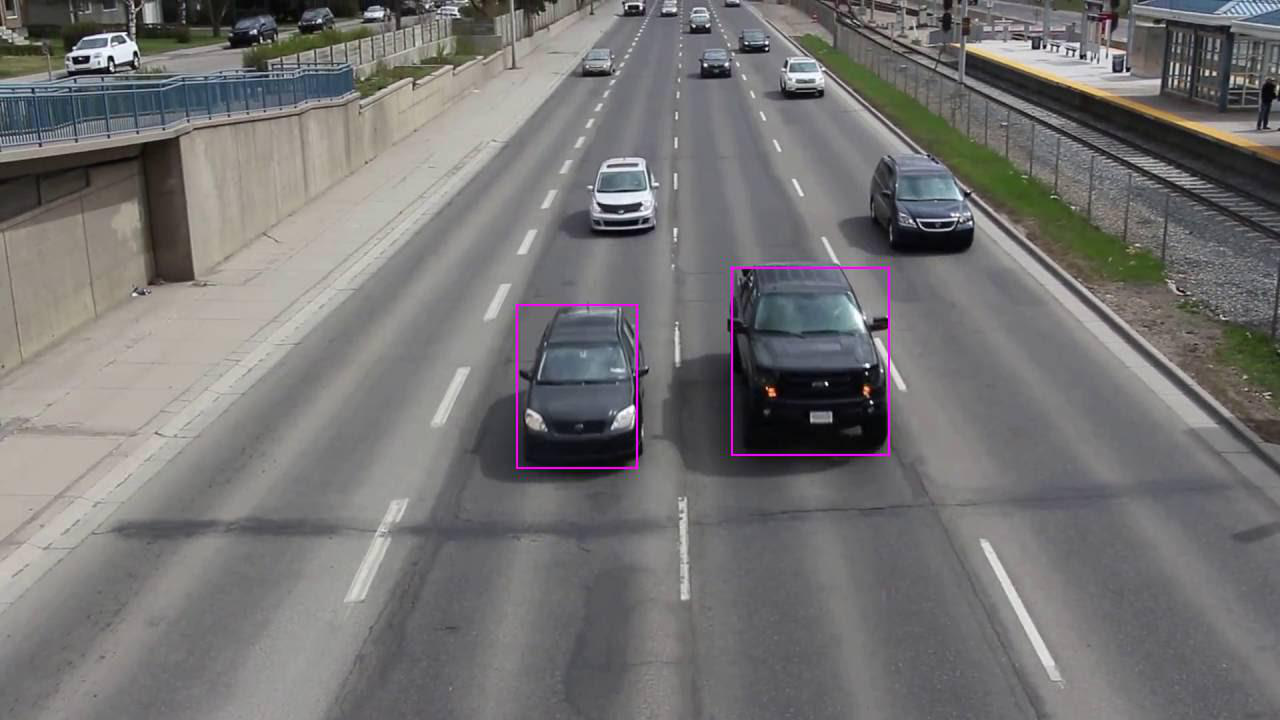

HxW: (720, 1280)


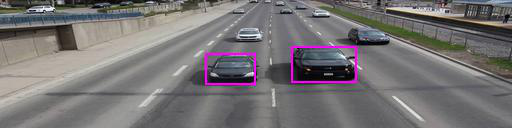

HxW: (128, 512)


In [85]:
from IPython.display import display
from PIL import Image


path = '/workspace/inferred_images/images_annotated/car001_720x1280.jpg'
image = Image.open(path)
display(image)
width, height = image.size
print("HxW: ({}, {})".format(height, width))

path = '/workspace/inferred_images/images_annotated/car001_128x512.jpg'
image = Image.open(path)
display(image)
width, height = image.size
print("HxW: ({}, {})".format(height, width))

So far so good, we have pruned our model and after re-training mean average precision is much higher than the previous training. also the model is able to draw the bounding boxes successfully.

## Exporting model
There are three opions available for exporting the model:  
- **FP16**
- **FP32**
- **INT8**

for exporting to **INT8** a calibration file is need to be generated.  
we are going to export with **INT8**  
so make sure we have the export directory: ``/workspace/exported_model``

In [86]:
import os
os.makedirs('/workspace/exported_model')

Generating **INT8** calibration file

In [87]:
!tlt-int8-tensorfile detectnet_v2 -e spec_files/retrain.txt \
        -o exported_model/calibration.tensor -m 20

Using TensorFlow backend.
2019-11-20 07:06:55,022 [INFO] iva.detectnet_v2.spec_handler.spec_loader: Merging specification from spec_files/retrain.txt
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
2019-11-20 07:06:55,029 [WARNING] tensorflow: From ./detectnet_v2/dataloader/utilities.py:114: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Instructions for updating:
Colocations handled automatically by placer.
2019-11-20 07:06:55,090 [WARNING] tensorflow: From /usr/local/lib/python2.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py:358: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
target/truncation is not updated to match the crop areaif the dataset contains 

Writing calibration tensorfile: 100%|###########| 20/20 [00:08<00:00,  2.42it/s]
Time taken to run iva.detectnet_v2.scripts.calibration_tensorfile:main: 0:00:15.354930.


Now we export the model

In [88]:
!tlt-export "/workspace/retrained_model/model.step-9600.tlt" \
            -k $API_KEY \
            --export_module detectnet_v2 \
            --outputs output_bbox/BiasAdd,output_cov/Sigmoid \
            --data_type int8  --output_file exported_model/smchyd_demo_model.etlt \
            --cal_data_file exported_model/calibration.tensor \
            --cal_cache_file exported_model/calibration.bin \
            --input_dims 3,128,512

Using TensorFlow backend.
2019-11-20 07:12:08,989 [INFO] iva.common.magnet_export: Loading model from /workspace/retrained_model/model.step-9600.tlt
2019-11-20 07:12:08.990892: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-11-20 07:12:10.433288: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x6909790 executing computations on platform CUDA. Devices:
2019-11-20 07:12:10.433332: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2019-11-20 07:12:10.433359: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (1): Tesla V100-SXM2-32GB, Compute Capability 7.0
2019-11-20 07:12:10.433370: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (2): Tesla V100-SXM2-32GB, Compute Capability 7.0
2019-11-20 07:12:10.433396: I tensorflow/compiler/xla/service/service.c

2019-11-20 07:12:27.670849: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1, 2, 3, 4, 5, 6, 7
2019-11-20 07:12:27.671998: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-11-20 07:12:27.672016: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 2 3 4 5 6 7 
2019-11-20 07:12:27.672025: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y Y Y Y N N N 
2019-11-20 07:12:27.672032: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N Y Y N Y N N 
2019-11-20 07:12:27.672039: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 2:   Y Y N Y N N Y N 
2019-11-20 07:12:27.672048: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 3:   Y Y Y N N N N Y 
2019-11-20 07:12:27.672073: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 4:   Y N N N N Y Y Y 
2019-11-20 07:12:27.672081: I tensorflow/core/common_runtime/gpu/gpu_device

INFO:tensorflow:Restoring parameters from /tmp/tmpPjQ1Ac.ckpt
2019-11-20 07:12:30,836 [INFO] tensorflow: Restoring parameters from /tmp/tmpPjQ1Ac.ckpt
Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants
2019-11-20 07:12:31,120 [WARNING] tensorflow: From /usr/local/lib/python2.7/dist-packages/tensorflow/python/tools/freeze_graph.py:232: convert_variables_to_constants (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
2019-11-20 07:12:31,120 [WARNING] tensorflow: From /usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/graph_util_impl.py:245: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub

If you wish to export with ``FP16`` or ``FP32`` use below commands:   

**FP16**  

In [ ]:
!tlt-export "/workspace/retrained_model/model.step-9600.tlt" \
            -k $API_KEY \
            --export_module detectnet_v2 \
            --outputs output_bbox/BiasAdd,output_cov/Sigmoid \
            --data_type fp16 \
            --output_file exported_model/smchyd_demo_model.etlt

**FP32**

In [ ]:
!tlt-export "/workspace/retrained_model/model.step-9600.tlt" \
            -k $KEY \
            --export_module detectnet_v2 \
            --outputs output_bbox/BiasAdd,output_cov/Sigmoid \
            --data_type fp32 \
            --output_file exported_model/smchyd_demo_model.etlt

## Review DeepStream config files
The .etlt files above can be run directly in DeepStream using the tlt-encoded-model and tlt-model-key parameters.  
We are going to convert our .etlt models in TensorRT engines first, then use the config files below to run the model.  
- labels.txt
- primary_inference.txt
    - This is looking for a file called INT8_m1.plan. We need to build this file on the Jetson device.
- stream_config.txt
    - You need to replace /path/to/your/mp4/video with the path to your input video.

These files are already created inside : ``/workspace/deepstream``

In [89]:
import os
print(os.listdir('/workspace/deepstream'))

['labels.txt', 'primary_inference.txt', '.ipynb_checkpoints', 'stream_config.txt']


let's quickly have a look to what's inside each of these files.

In [90]:
!cat /workspace/deepstream/labels.txt

car
cyclist
pedestrian

In [93]:
!cat /workspace/deepstream/primary_inference.txt

# Copyright (c) 2018 NVIDIA Corporation.  All rights reserved.
#
# NVIDIA Corporation and its licensors retain all intellectual property
# and proprietary rights in and to this software, related documentation
# and any modifications thereto.  Any use, reproduction, disclosure or
# distribution of this software and related documentation without an express
# license agreement from NVIDIA Corporation is strictly prohibited.

# Following properties are mandatory when engine files are not specified:
#   int8-calib-file(Only in INT8)
#   Caffemodel mandatory properties: model-file, proto-file, output-blob-names
#   UFF: uff-file, input-dims, uff-input-blob-name, output-blob-names
#   ONNX: onnx-file
#
# Mandatory properties for detectors:
#   num-detected-classes
#
# Optional properties for detectors:
#   enable-dbscan(Default=false), interval(Primary mode only, Default=0)
#   custom-lib-path,
#   parse-bbox-func-name
#
# Mandatory properties for classifiers:
#   classifier-threshold, is-cla

In [92]:
!cat /workspace/deepstream/stream_config.txt

# Copyright (c) 2018 NVIDIA Corporation.  All rights reserved.
#
# NVIDIA Corporation and its licensors retain all intellectual property
# and proprietary rights in and to this software, related documentation
# and any modifications thereto.  Any use, reproduction, disclosure or
# distribution of this software and related documentation without an express
# license agreement from NVIDIA Corporation is strictly prohibited.

[application]
enable-perf-measurement=1
perf-measurement-interval-sec=5
#gie-kitti-output-dir=streamscl

[tiled-display]
enable=1
rows=1
columns=1
width=768
height=768

[source0]
enable=1
#Type - 1=CameraV4L2 2=URI 3=MultiURI 4=RTSP
type=3
uri=file:///path/to/your/mp4/video
num-sources=1
#drop-frame-interval=2
gpu-id=0
# (0): memtype_device   - Memory type Devqice
# (1): memtype_pinned   - Memory type Host Pinned
# (2): memtype_unified  - Memory type Unified
cudadec-memtype=0

[sink0]
enable=1
#Type - 1=FakeSink 2=EglSink 3=File 4=RTSPStreaming 5=Overlay
type=5
sync=0

## Copy files to edge device
Now we move to the Jetson AGX Xavier to run our inference.

``scp /workspace/exported_model/* <Jetson IP>:~/tlt``

We also need to copy the DeepStream config files (discussed above) to a directory on the Jetson.

``scp -r deepstream/* <Jetson IP>:~/tlt/configs``

**OR**  

``you can manually copy those files to your edge device``

## Run DeepStream (on Jetson)
1. Download tlt-converter from developer.nvidia.com/transfer-learning-toolkit
2. Convert your model to a TensorRT Engine. This creates the INT8_m1.plan file discussed above.
````bash
./tlt-converter -k $KEY -d 3,768,768 \
-o output_bbox/BiasAdd,output_cov/Sigmoid \
-e ~/tlt/ds_configs/INT8_m1.plan \
-t int8 \
-c ~/tlt/calibration.bin \
-m 1 \
~/tlt/INT8_model.etlt
````
3. Change to the DeepStream samples directory
````bash
cd /opt/nvidia/deepstream/deepstream-4.0/samples
````
4. Run the stream!
````bash
 deepstream-app -c ~/tlt/ds_configs/stream_config.txt
````